In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# descarga de las reservas diarias desde el 2000 hasta 2021
temp_reserva_diario = pd.DataFrame({'Fecha' : []})
for year in range(2000, 2020):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Reservas/Reservas_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    temp_reserva_diario = pd.concat([temp_reserva_diario, new_data])
temp_reserva_diario['Volumen Útil Diario Energía gWh'] = temp_reserva_diario['Volumen Útil Diario Energía kWh']/1000000
temp_reserva_diario['Volumen Energía gWh'] = temp_reserva_diario['Volumen Energía kWh']/1000000
temp_reserva_diario['Volumen Útil Díario %'] = temp_reserva_diario['Volumen Útil Díario %']*100
temp_reserva_diario['Volumen %'] = temp_reserva_diario['Volumen %']*100

In [4]:
# descarga de las reservas diarias desde el 2020 hasta 2021
temp_reserva_diario_2 = pd.DataFrame({'Fecha' : []})
for year in range(2020, 2022):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Reservas_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    temp_reserva_diario_2 = pd.concat([temp_reserva_diario_2, new_data]) 
temp_reserva_diario_2['Volumen Útil Diario Energía gWh'] = temp_reserva_diario_2['Volumen Útil Diario Energía kWh']/1000000
temp_reserva_diario_2['Volumen Energía gWh'] = temp_reserva_diario_2['Volumen Energía kWh']/1000000
temp_reserva_diario_2['Volumen Útil Díario %'] = temp_reserva_diario_2['Volumen Útil Díario %']*100
temp_reserva_diario_2['Volumen %'] = temp_reserva_diario_2['Volumen %']*100

In [5]:
df_rd = pd.concat([temp_reserva_diario,temp_reserva_diario_2])

In [6]:
df_rd['Fecha'] = pd.to_datetime(df_rd['Fecha'])
# creando las columnas dias, meses y años
df_rd['Year'] = df_rd['Fecha'].dt.year.astype(object)
df_rd['Month'] = df_rd['Fecha'].dt.month_name()
df_rd['Weekday Name'] = df_rd['Fecha'].dt.day_name()

In [7]:
df_rd.tail(2)

Fecha Region Hidrologica Nombre Embalse  ...  Year      Month  Weekday Name
5610 2021-09-01              VALLE        CALIMA1  ...  2021  September     Wednesday
5611 2021-09-01              VALLE      SALVAJINA  ...  2021  September     Wednesday

[2 rows x 14 columns]

In [8]:
df_rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165227 entries, 0 to 5611
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Fecha                            165227 non-null  datetime64[ns]
 1   Region Hidrologica               165227 non-null  object        
 2   Nombre Embalse                   165227 non-null  object        
 3   Volumen Útil Diario Mm3          164948 non-null  float64       
 4   Volumen Útil Diario Energía kWh  164877 non-null  float64       
 5   Volumen Útil Díario %            164889 non-null  float64       
 6   Volumen Mm3                      165227 non-null  float64       
 7   Volumen Energía kWh              165227 non-null  float64       
 8   Volumen %                        165227 non-null  float64       
 9   Volumen Útil Diario Energía gWh  164877 non-null  float64       
 10  Volumen Energía gWh              165227 non-nu

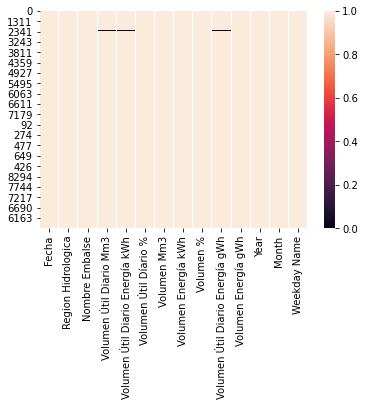

In [9]:
sns.heatmap(df_rd.notna())

In [10]:
#Missing values
df_rd.isnull().sum()

Fecha                                0
Region Hidrologica                   0
Nombre Embalse                       0
Volumen Útil Diario Mm3            279
Volumen Útil Diario Energía kWh    350
Volumen Útil Díario %              338
Volumen Mm3                          0
Volumen Energía kWh                  0
Volumen %                            0
Volumen Útil Diario Energía gWh    350
Volumen Energía gWh                  0
Year                                 0
Month                                0
Weekday Name                         0
dtype: int64

In [11]:
df_rd.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


Fecha Region Hidrologica  ...   Month  Weekday Name
count                165227             165227  ...  165227        165227
unique                 7915                  5  ...      12             7
top     2018-07-17 00:00:00          ANTIOQUIA  ...     May     Wednesday
freq                     23              73594  ...   14260         23612
first   2000-01-01 00:00:00                NaN  ...     NaN           NaN
last    2021-09-01 00:00:00                NaN  ...     NaN           NaN
mean                    NaN                NaN  ...     NaN           NaN
std                     NaN                NaN  ...     NaN           NaN
min                     NaN                NaN  ...     NaN           NaN
25%                     NaN                NaN  ...     NaN           NaN
50%                     NaN                NaN  ...     NaN           NaN
75%                     NaN                NaN  ...     NaN           NaN
max                     NaN                NaN  ...     NaN           NaN

[13 rows x 14 columns]

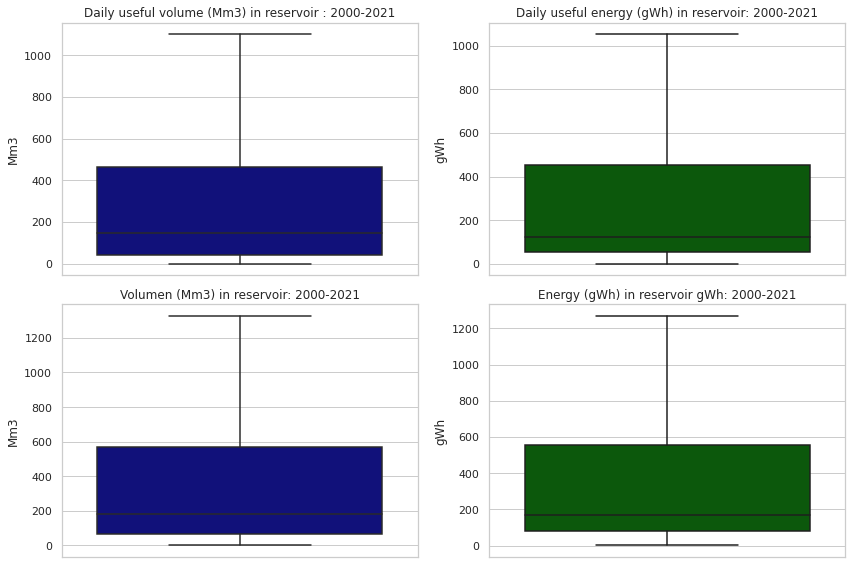

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(12,8))

plt.subplot(221)
sns.boxplot(data=df_rd, y='Volumen Útil Diario Mm3',color="darkblue",showfliers=False)
plt.ylabel('Mm3')
plt.title("Daily useful volume (Mm3) in reservoir : 2000-2021")

plt.subplot(222)
sns.boxplot(data=df_rd, y='Volumen Útil Diario Energía gWh',color="darkgreen",showfliers=False)
plt.ylabel('gWh')
plt.title("Daily useful energy (gWh) in reservoir: 2000-2021")

#plt.subplot(223)
#sns.boxplot(data=df_rd, y='Volumen Útil Díario %',color="darkred")
#plt.ylabel('Volumen Útil Díario %')
#plt.title("Volumen Útil Díario %: 2000-2021")

plt.subplot(223)
sns.boxplot(data=df_rd, y='Volumen Mm3',color="darkblue",showfliers=False)
plt.ylabel('Mm3')
plt.title("Volumen (Mm3) in reservoir: 2000-2021")

plt.subplot(224)
sns.boxplot(data=df_rd, y='Volumen Energía gWh',color="darkgreen",showfliers=False)
plt.ylabel('gWh')
plt.title("Energy (gWh) in reservoir gWh: 2000-2021")

#plt.subplot(222)
#sns.boxplot(data=df_rd, y='Volumen %',color="darkred")
#plt.ylabel('Volumen %')
#plt.title("Volumen %: 2000-2021")

plt.tight_layout()

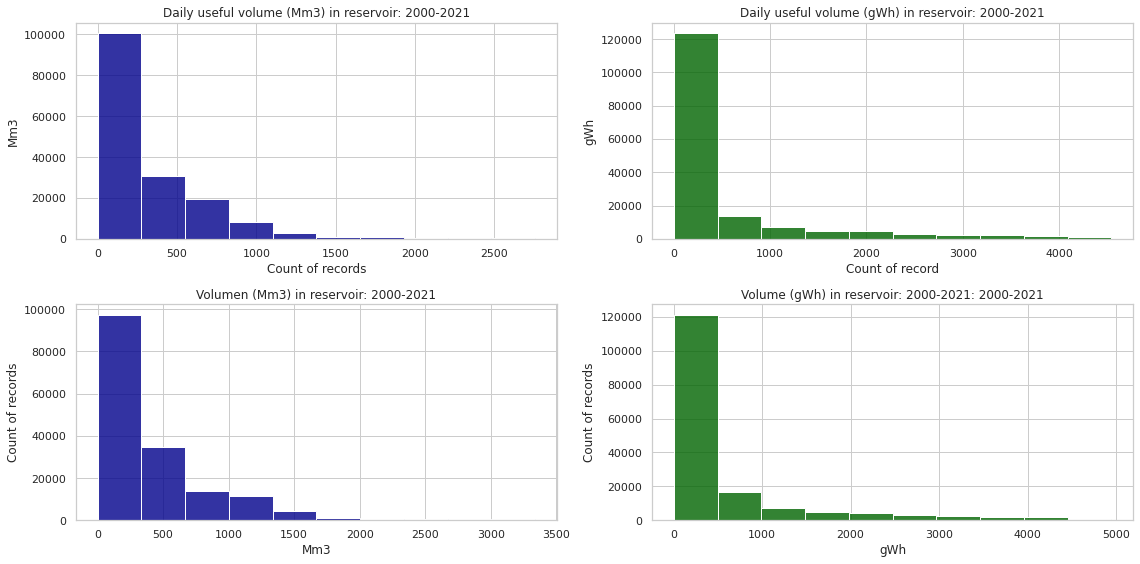

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(16,8))

plt.subplot(221)
sns.histplot(data=df_rd, x='Volumen Útil Diario Mm3',bins=10,color="darkblue",alpha=0.8)
plt.xlabel('Count of records')
plt.ylabel('Mm3')
plt.title("Daily useful volume (Mm3) in reservoir: 2000-2021")

plt.subplot(222)
sns.histplot(data=df_rd, x='Volumen Útil Diario Energía gWh',bins=10, color="darkgreen",alpha=0.8)
plt.xlabel('Count of record')
plt.ylabel('gWh')
plt.title("Daily useful volume (gWh) in reservoir: 2000-2021")

#plt.subplot(223)
#sns.histplot(data=df_rd, x='Volumen Útil Díario %',bins=10, color="darkred",alpha=0.8)
#plt.xlabel('Volumen Útil Díario %')
#plt.ylabel('Volumen')
#plt.title("Volumen Útil Díario %: 2000-2021")

plt.subplot(223)
sns.histplot(data=df_rd, x='Volumen Mm3',bins=10, color="darkblue",alpha=0.8)
plt.xlabel('Mm3')
plt.ylabel('Count of records')
plt.title("Volumen (Mm3) in reservoir: 2000-2021")

#plt.tight_layout()

#plt.figure(figsize=(16,8))

plt.subplot(224)
sns.histplot(data=df_rd, x='Volumen Energía gWh',bins=10,color="darkgreen",alpha=0.8)
plt.xlabel('gWh')
plt.ylabel('Count of records')
plt.title("Volume (gWh) in reservoir: 2000-2021: 2000-2021")

#plt.subplot(222)
#sns.histplot(data=df_rd, x='Volumen %',bins=10, color="darkgreen",alpha=0.8)
#plt.xlabel('Volumen %')
#plt.ylabel('Volumen')
#plt.title("Volumen %: 2000-2021")

plt.tight_layout()

Text(0.5, 1.0, 'Count of records by hydrological region between 2000 to 2021')

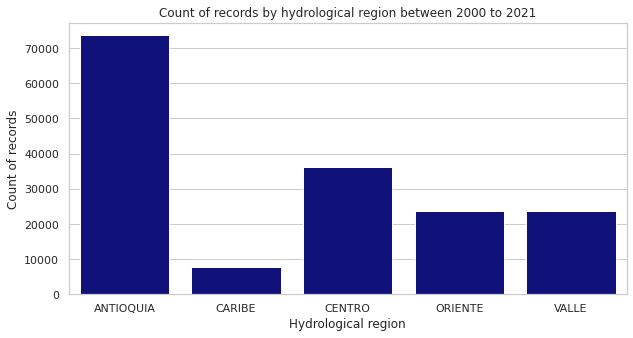

In [14]:
df_rh = df_rd.groupby(['Region Hidrologica']).size()
df_rh = df_rh.reset_index()
df_rh.columns = ['Region Hidrologica','Count of records']

# Gráfica
plt.subplots(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x='Region Hidrologica', y='Count of records', data = df_rh,color="darkblue")
plt.xlabel("Hydrological region")
plt.title("Count of records by hydrological region between 2000 to 2021")

Text(0.5, 1.0, 'Count of records by damming between 2000 to 2021')

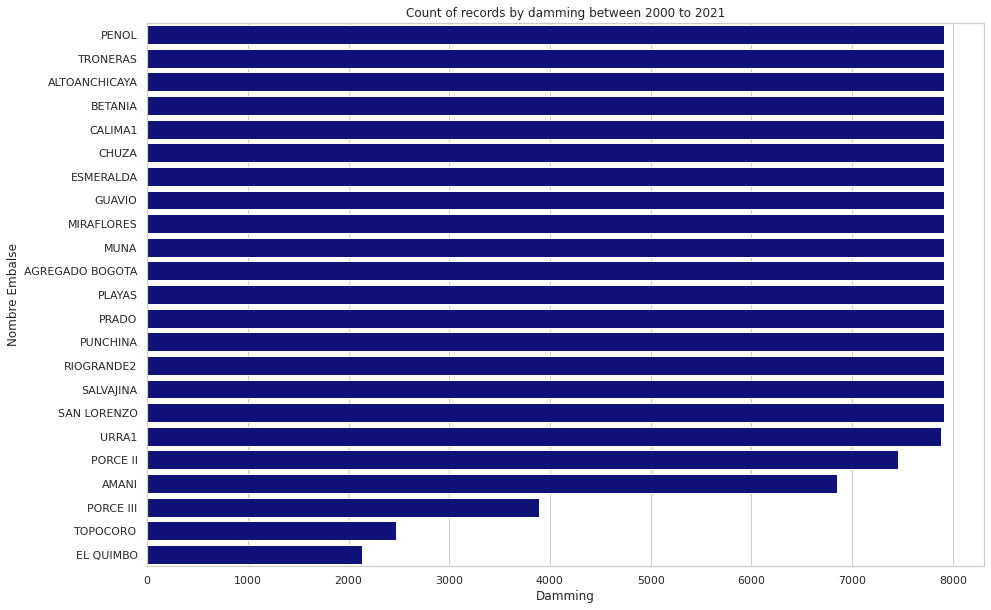

In [15]:
df_rh = df_rd.groupby(['Nombre Embalse']).size().sort_values(ascending=False)
df_rh = df_rh.reset_index()
df_rh.columns = ['Nombre Embalse','Count of records']

# Gráfica
plt.subplots(figsize=(15,10))
sns.set_theme(style="whitegrid")
sns.barplot(x='Count of records', y='Nombre Embalse', data = df_rh,color="darkblue")
plt.xlabel("Damming")
plt.title("Count of records by damming between 2000 to 2021")

In [16]:
# Volumen diario Mm3 según región hidrologica desde 2000 hasta 2021
df_by_day_rr = df_rd.groupby(by=['Fecha','Region Hidrologica']).sum().reset_index()
df_temp_rg_vd = df_by_day_rr.groupby(['Region Hidrologica'])['Volumen Útil Diario Mm3'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_rg_vd

Region Hidrologica  count           sum  ...       min     median       max
0             CENTRO   7915  1.836853e+07  ...  637.9170  1622.2220  6501.446
1          ANTIOQUIA   7915  1.178021e+07  ...  622.3630  1504.2002  2202.284
2            ORIENTE   7915  8.446971e+06  ...  277.8500  1183.6640  1619.749
3             CARIBE   7884  6.559336e+06  ...   52.0400   875.8200  1520.160
4              VALLE   7915  5.056833e+06  ...  118.3564   652.1400  1161.990

[5 rows x 8 columns]

In [17]:
# Volumen Mm3 según Embalse desde 2000 hasta 2021
df_temp_rg_v = df_by_day_rr.groupby(['Region Hidrologica'])['Volumen Mm3'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_rg_v

Region Hidrologica  count           sum  ...      min    median       max
0             CENTRO   7915  2.661899e+07  ...  814.507  2431.706  8317.236
1          ANTIOQUIA   7915  1.397104e+07  ...  925.923  1725.436  2509.324
2             CARIBE   7884  9.528522e+06  ...  472.150  1251.315  1879.130
3            ORIENTE   7915  8.818223e+06  ...  332.070  1230.293  1620.808
4              VALLE   7915  6.763003e+06  ...  335.030   865.510  1398.170

[5 rows x 8 columns]

In [18]:
# Volumen diario Mm3 según embalse desde 2000 hasta 2021
df_by_day_re = df_rd.groupby(by=['Fecha','Nombre Embalse']).sum().reset_index()
df_temp_ne_vd = df_by_day_re.groupby(['Nombre Embalse'])['Volumen Útil Diario Mm3'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_ne_vd

Nombre Embalse  count           sum  ...      min    median        max
0             PENOL   7915  6.638742e+06  ...  342.250   869.123  1152.3776
1             URRA1   7884  6.559336e+06  ...   52.040   875.820  1520.1600
2           BETANIA   7915  5.026093e+06  ...   51.540   634.700  1649.4600
3            GUAVIO   7915  4.299997e+06  ...  132.498   593.072   795.1670
4          TOPOCORO   2467  4.275597e+06  ...  425.180  1744.870  2757.0000
5   AGREGADO BOGOTA   7915  3.671645e+06  ...  213.298   466.535   724.0910
6         EL QUIMBO   2132  3.101488e+06  ...  801.450  1377.380  2360.2600
7         ESMERALDA   7915  2.936833e+06  ...   23.405   419.530   622.3760
8         SALVAJINA   7915  2.793427e+06  ...    0.000   361.380   707.8200
9             PRADO   7915  2.193550e+06  ...    0.000   282.390   578.0500
10          CALIMA1   7915  2.189015e+06  ...   35.900   287.690   438.1600
11            AMANI   6850  1.673674e+06  ...    5.120   242.575   469.8920
12            CHUZA   7915  1.210140e+06  ...   59.850   155.700   224.0400
13      SAN LORENZO   7915  8.854152e+05  ...   10.930   120.380   182.1600
14       RIOGRANDE2   7915  7.590524e+05  ...    5.719   102.599   153.7640
15       MIRAFLORES   7915  5.272151e+05  ...    0.000    71.741    98.6116
16         PORCE II   7452  3.553366e+05  ...    0.000    47.360   112.0740
17           PLAYAS   7915  3.404443e+05  ...    2.249    43.923    69.1150
18        PORCE III   3887  2.862957e+05  ...    3.665    73.963   126.3820
19         PUNCHINA   7915  2.126513e+05  ...    0.000    25.624    58.3800
20         TRONERAS   7915  1.013855e+05  ...    0.000    12.494    31.2240
21             MUNA   7915  1.001553e+05  ...    0.003    11.339    38.9980
22    ALTOANCHICAYA   7915  7.439027e+04  ...   -0.530     7.790    31.3700

[23 rows x 8 columns]

In [19]:
# Volumen  Mm3 según embalse desde 2000 hasta 2021
df_temp_ne_v = df_by_day_re.groupby(['Nombre Embalse'])['Volumen Útil Diario Mm3'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_ne_v

Nombre Embalse  count           sum  ...      min    median        max
0             PENOL   7915  6.638742e+06  ...  342.250   869.123  1152.3776
1             URRA1   7884  6.559336e+06  ...   52.040   875.820  1520.1600
2           BETANIA   7915  5.026093e+06  ...   51.540   634.700  1649.4600
3            GUAVIO   7915  4.299997e+06  ...  132.498   593.072   795.1670
4          TOPOCORO   2467  4.275597e+06  ...  425.180  1744.870  2757.0000
5   AGREGADO BOGOTA   7915  3.671645e+06  ...  213.298   466.535   724.0910
6         EL QUIMBO   2132  3.101488e+06  ...  801.450  1377.380  2360.2600
7         ESMERALDA   7915  2.936833e+06  ...   23.405   419.530   622.3760
8         SALVAJINA   7915  2.793427e+06  ...    0.000   361.380   707.8200
9             PRADO   7915  2.193550e+06  ...    0.000   282.390   578.0500
10          CALIMA1   7915  2.189015e+06  ...   35.900   287.690   438.1600
11            AMANI   6850  1.673674e+06  ...    5.120   242.575   469.8920
12            CHUZA   7915  1.210140e+06  ...   59.850   155.700   224.0400
13      SAN LORENZO   7915  8.854152e+05  ...   10.930   120.380   182.1600
14       RIOGRANDE2   7915  7.590524e+05  ...    5.719   102.599   153.7640
15       MIRAFLORES   7915  5.272151e+05  ...    0.000    71.741    98.6116
16         PORCE II   7452  3.553366e+05  ...    0.000    47.360   112.0740
17           PLAYAS   7915  3.404443e+05  ...    2.249    43.923    69.1150
18        PORCE III   3887  2.862957e+05  ...    3.665    73.963   126.3820
19         PUNCHINA   7915  2.126513e+05  ...    0.000    25.624    58.3800
20         TRONERAS   7915  1.013855e+05  ...    0.000    12.494    31.2240
21             MUNA   7915  1.001553e+05  ...    0.003    11.339    38.9980
22    ALTOANCHICAYA   7915  7.439027e+04  ...   -0.530     7.790    31.3700

[23 rows x 8 columns]

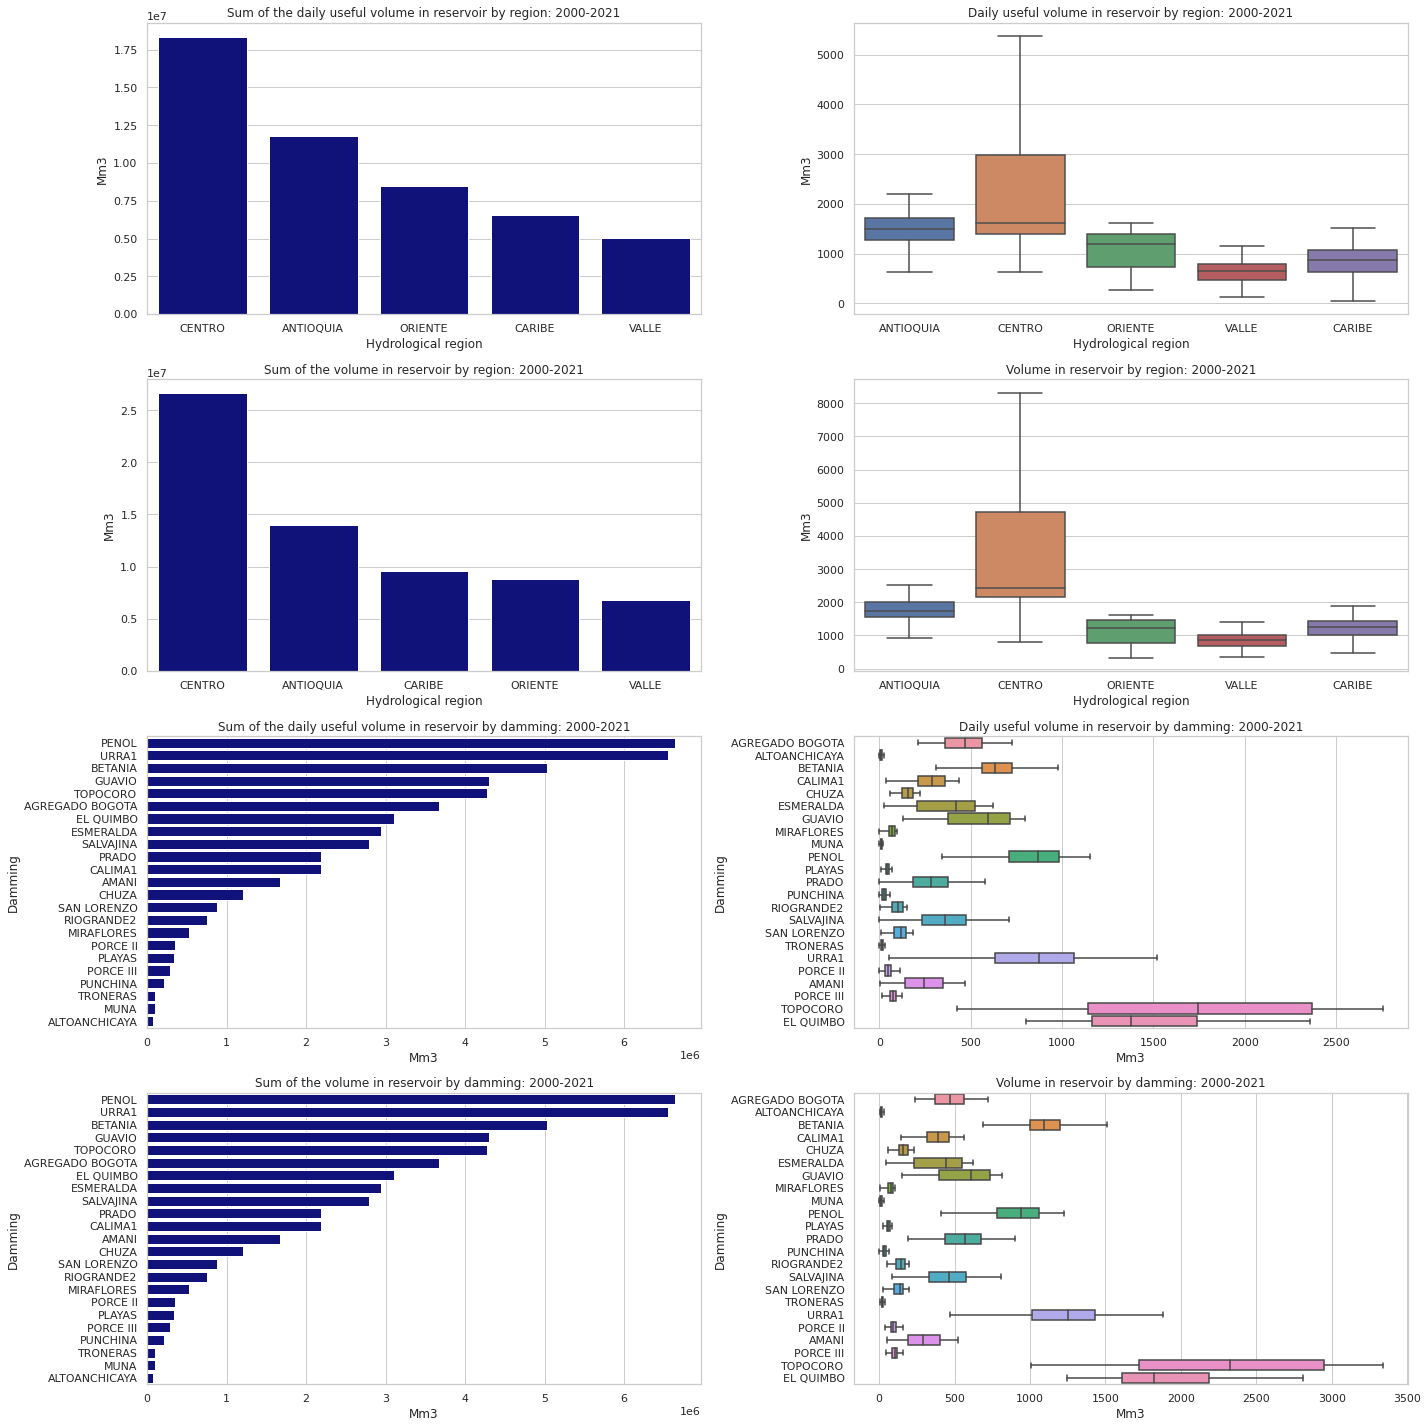

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,20))

plt.subplot(421)
sns.barplot(x='Region Hidrologica', y='sum', data = df_temp_rg_vd,color="darkblue")
plt.ylabel('Mm3')
plt.xlabel('Hydrological region')
plt.title("Sum of the daily useful volume in reservoir by region: 2000-2021")

plt.subplot(422)
sns.boxplot(x='Region Hidrologica', y='Volumen Útil Diario Mm3', data = df_by_day_rr,showfliers=False)
plt.ylabel('Mm3')
plt.xlabel('Hydrological region')
plt.title("Daily useful volume in reservoir by region: 2000-2021")

plt.subplot(423)
sns.barplot(x='Region Hidrologica', y='sum', data = df_temp_rg_v,color="darkblue")
plt.ylabel('Mm3')
plt.xlabel('Hydrological region')
plt.title("Sum of the volume in reservoir by region: 2000-2021")

plt.subplot(424)
sns.boxplot(x='Region Hidrologica', y='Volumen Mm3', data = df_by_day_rr,showfliers=False)
plt.ylabel('Mm3')
plt.xlabel('Hydrological region')
plt.title("Volume in reservoir by region: 2000-2021")

plt.subplot(425)
sns.barplot(x='sum', y='Nombre Embalse', data = df_temp_ne_vd,color="darkblue")
plt.xlabel('Mm3')
plt.ylabel('Damming')
plt.title("Sum of the daily useful volume in reservoir by damming: 2000-2021")

plt.subplot(426)
sns.boxplot(x='Volumen Útil Diario Mm3', y='Nombre Embalse',  data = df_by_day_re,showfliers=False)
plt.xlabel('Mm3')
plt.ylabel('Damming')
plt.title("Daily useful volume in reservoir by damming: 2000-2021")

plt.subplot(427)
sns.barplot(x='sum', y='Nombre Embalse', data = df_temp_ne_v,color="darkblue")
plt.xlabel('Mm3')
plt.ylabel('Damming')
plt.title("Sum of the volume in reservoir by damming: 2000-2021")

plt.subplot(428)
sns.boxplot(x='Volumen Mm3', y='Nombre Embalse',  data = df_by_day_re,showfliers=False)
plt.xlabel('Mm3')
plt.ylabel('Damming')
plt.title("Volume in reservoir by damming: 2000-2021")

plt.tight_layout()

In [21]:
# Volumen diario energía gWh según región hidrologica desde 2000 hasta 2021
df_temp_rg_vd_g = df_by_day_rr.groupby(['Region Hidrologica'])['Volumen Útil Diario Energía gWh'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_rg_vd_g

Region Hidrologica  count  ...       median          max
0          ANTIOQUIA   7915  ...  4592.081807  6333.973695
1            ORIENTE   7915  ...  3187.252600  4293.417105
2             CENTRO   7915  ...  2833.624357  4195.874100
3              VALLE   7915  ...   254.391376   454.059125
4             CARIBE   7884  ...   110.819511   198.228864

[5 rows x 8 columns]

In [22]:
# Volumen energía gWh según región hidrologica desde 2000 hasta 2021
df_temp_rg_v_g = df_by_day_rr.groupby(['Region Hidrologica'])['Volumen Energía gWh'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_rg_v_g

Region Hidrologica  count           sum  ...        min      median        max
0          ANTIOQUIA   7915  4.074833e+07  ...  2537.5833  5233.71910  7052.3449
1             CENTRO   7915  2.425835e+07  ...  1627.9378  3069.35090  4735.1300
2            ORIENTE   7915  2.405719e+07  ...   986.1236  3316.41420  4402.7046
3              VALLE   7915  2.665513e+06  ...   146.3394   342.11460   558.5087
4             CARIBE   7884  1.209433e+06  ...    60.8632   158.45855   245.0386

[5 rows x 8 columns]

In [ ]:
# Volumen diario Energía gWh según Embalse desde 2000 hasta 2021
df_temp_ne_vd_g = df_by_day_re.groupby(['Nombre Embalse'])['Volumen Útil Diario Energía gWh'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_ne_vd_g

Nombre Embalse  count           sum  ...          min       median          max
0             PENOL   7870  2.640848e+07  ...  1402.061350  3488.766958  4544.150076
1   AGREGADO BOGOTA   7870  1.733104e+07  ...   893.739950  2245.797882  3607.055742
2            GUAVIO   7870  1.169290e+07  ...   360.281624  1619.100123  2195.535604
3             CHUZA   7870  5.630118e+06  ...   300.853980   731.935571  1108.258596
4         ESMERALDA   7870  5.554336e+06  ...    44.687200   792.396120  1132.398283
5        RIOGRANDE2   7870  2.381569e+06  ...    20.924700   307.108984   602.682500
6       SAN LORENZO   7870  2.280309e+06  ...    27.644156   313.027149   475.947600
7        MIRAFLORES   7870  1.525921e+06  ...     0.000000   207.107127   339.794369
8          TOPOCORO   2422  1.501723e+06  ...   154.085200   621.933400   999.136800
9         EL QUIMBO   2087  1.404648e+06  ...   378.889300   639.393200  1111.918500
10          CALIMA1   7870  1.121316e+06  ...    19.274710   147.080035   237.000744
11            AMANI   6805  8.700167e+05  ...     2.292736   124.740900   250.312700
12          BETANIA   7870  8.527144e+05  ...     8.895804   108.695124   268.532088
13            URRA1   7839  8.258733e+05  ...     6.702752   110.533500   198.228864
14        SALVAJINA   7870  7.317949e+05  ...     0.000000    94.275281   189.151800
15           PLAYAS   7870  6.484956e+05  ...     4.375205    83.636547   129.651812
16             MUNA   7870  4.627406e+05  ...     0.013514    53.862600   177.226411
17         PORCE II   7407  3.580368e+05  ...     0.000000    42.917262   144.492400
18         PUNCHINA   7870  3.107343e+05  ...     0.000000    37.477336    88.375481
19         TRONERAS   7870  2.908966e+05  ...     0.000000    36.134581    91.884847
20            PRADO   7870  2.859136e+05  ...     0.000000    36.931197    79.944315
21        PORCE III   3842  2.463748e+05  ...     3.239500    64.876760   109.396800
22    ALTOANCHICAYA   7870  8.885998e+04  ...    -0.653543     9.383190    38.374100

[23 rows x 8 columns]

In [23]:
# Volumen Energía gWh según Embalse desde 2000 hasta 2021
df_temp_ne_v_g = df_by_day_re.groupby(['Nombre Embalse'])['Volumen Energía gWh'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_ne_v_g

Nombre Embalse  count           sum  ...        min      median        max
0             PENOL   7915  2.889324e+07  ...  1682.5556  3779.77320  4947.5620
1   AGREGADO BOGOTA   7915  1.768717e+07  ...  1096.9142  2237.97110  3607.0557
2            GUAVIO   7915  1.216913e+07  ...   410.7317  1672.99910  2250.0776
3             CHUZA   7915  5.950686e+06  ...   300.8540   759.93160  1162.5981
4         ESMERALDA   7915  5.937379e+06  ...    84.2288   839.19460  1183.3163
5        RIOGRANDE2   7915  3.579139e+06  ...   132.8670   450.06040   796.2910
6       SAN LORENZO   7915  2.659875e+06  ...    72.0822   357.93340   526.8885
7          TOPOCORO   2467  2.058853e+06  ...   364.8534   838.51460  1209.9050
8         EL QUIMBO   2132  1.896020e+06  ...   585.6626   851.61835  1321.7653
9        MIRAFLORES   7915  1.662836e+06  ...    18.0226   222.96380   358.0794
10          CALIMA1   7915  1.564058e+06  ...    74.3382   201.69560   304.0723
11          BETANIA   7915  1.470508e+06  ...    22.2297   187.97560   298.3086
12            URRA1   7884  1.209433e+06  ...    60.8632   158.45855   245.0386
13            AMANI   6850  1.054253e+06  ...    23.7782   151.81540   278.0832
14        SALVAJINA   7915  9.545164e+05  ...    21.3684   121.43100   214.7530
15           PLAYAS   7915  9.293928e+05  ...    28.7093   116.79080   167.5293
16         PORCE II   7452  7.214049e+05  ...    25.9996    87.87290   204.9331
17            PRADO   7915  5.819662e+05  ...    22.1950    75.43190   124.9029
18             MUNA   7915  5.638360e+05  ...     2.5245    57.75680   184.7930
19         TRONERAS   7915  4.900675e+05  ...    24.4319    59.49770   124.6592
20         PUNCHINA   7915  4.089267e+05  ...     2.0790    49.78390    96.4190
21        PORCE III   3887  3.491888e+05  ...    29.5532    90.71820   135.7850
22    ALTOANCHICAYA   7915  1.469383e+05  ...     3.5015    16.91340    46.8331

[23 rows x 8 columns]

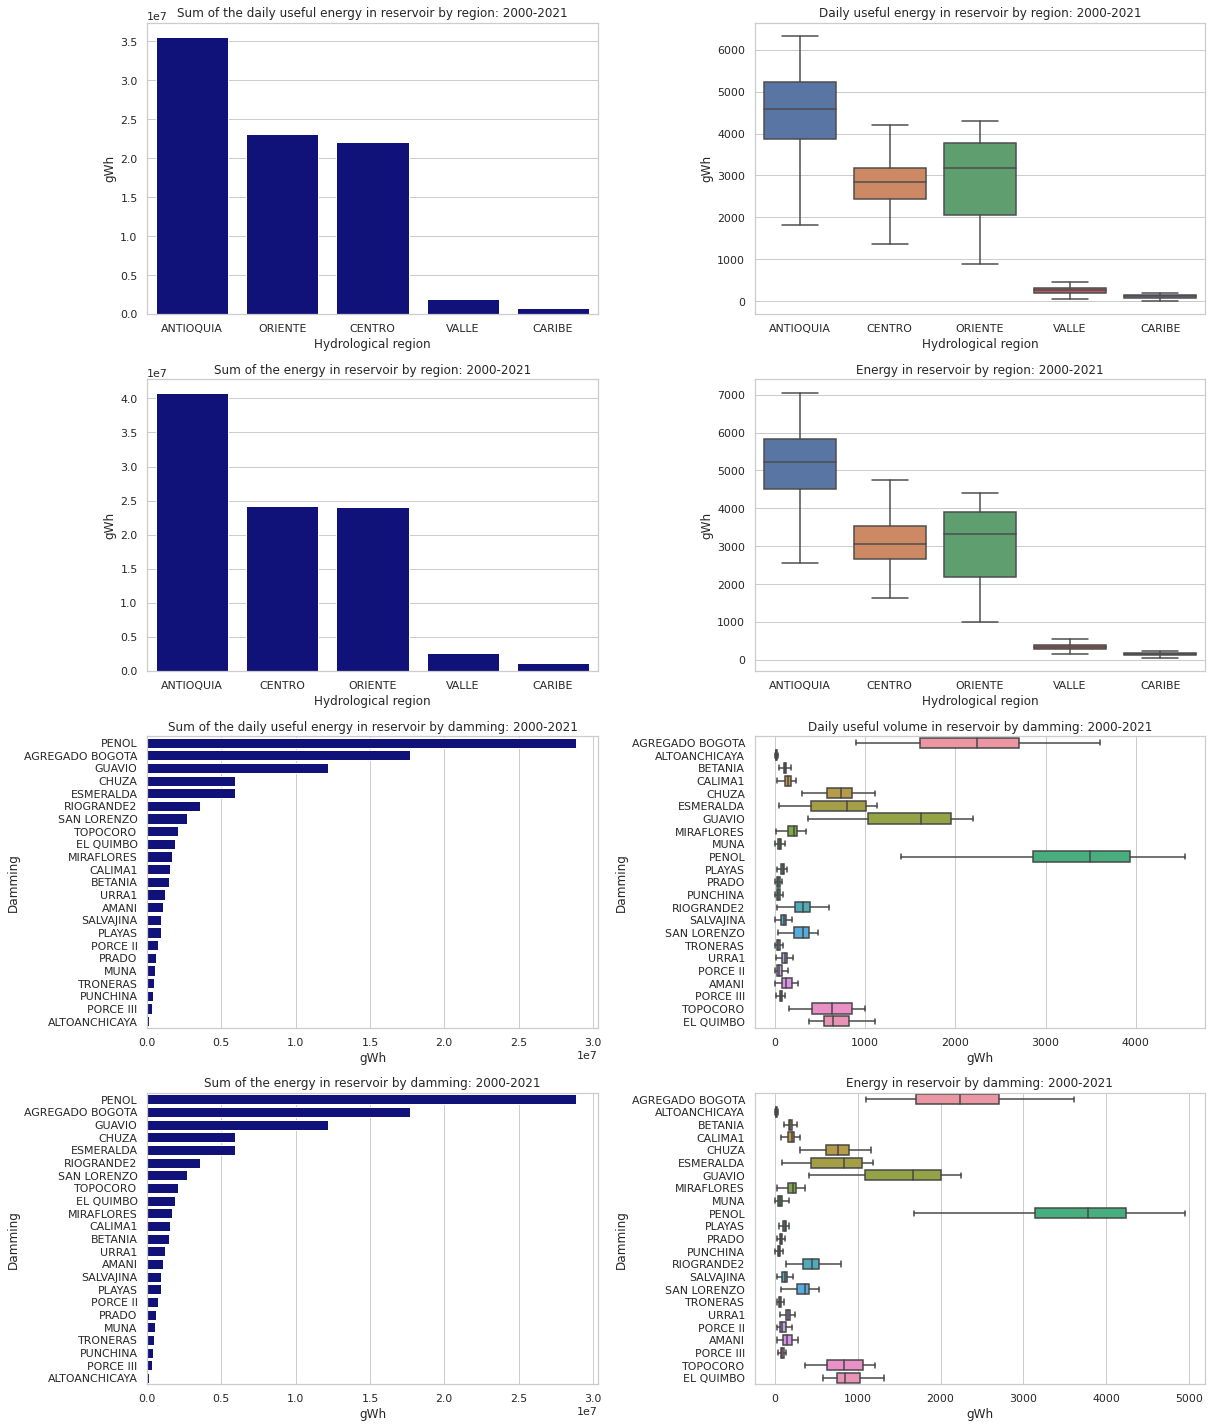

In [27]:
sns.set(style="whitegrid")

plt.figure(figsize=(17,20))

plt.subplot(421)
sns.barplot(x='Region Hidrologica', y='sum', data = df_temp_rg_vd_g,color="darkblue")
plt.ylabel('gWh')
plt.xlabel('Hydrological region')
plt.title("Sum of the daily useful energy in reservoir by region: 2000-2021")

plt.subplot(422)
sns.boxplot(x='Region Hidrologica', y='Volumen Útil Diario Energía gWh', data = df_by_day_rr,showfliers=False)
plt.ylabel('gWh')
plt.xlabel('Hydrological region')
plt.title("Daily useful energy in reservoir by region: 2000-2021")

plt.subplot(423)
sns.barplot(x='Region Hidrologica', y='sum', data = df_temp_rg_v_g,color="darkblue")
plt.ylabel('gWh')
plt.xlabel('Hydrological region')
plt.title("Sum of the energy in reservoir by region: 2000-2021")

plt.subplot(424)
sns.boxplot(x='Region Hidrologica', y='Volumen Energía gWh', data = df_by_day_rr,showfliers=False)
plt.ylabel('gWh')
plt.xlabel('Hydrological region')
plt.title("Energy in reservoir by region: 2000-2021")

plt.subplot(425)
sns.barplot(x='sum', y='Nombre Embalse', data = df_temp_ne_v_g, color="darkblue")
plt.xlabel('gWh')
plt.ylabel('Damming')
plt.title("Sum of the daily useful energy in reservoir by damming: 2000-2021")

plt.subplot(426)
sns.boxplot(x='Volumen Útil Diario Energía gWh', y='Nombre Embalse',  data = df_by_day_re,showfliers=False)
plt.xlabel('gWh')
plt.ylabel('Damming')
plt.title("Daily useful volume in reservoir by damming: 2000-2021")

plt.subplot(427)
sns.barplot(x='sum', y='Nombre Embalse', data = df_temp_ne_v_g,color="darkblue")
plt.xlabel('gWh')
plt.ylabel('Damming')
plt.title("Sum of the energy in reservoir by damming: 2000-2021")

plt.subplot(428)
sns.boxplot(x='Volumen Energía gWh', y='Nombre Embalse',  data = df_by_day_re,showfliers=False)
plt.xlabel('gWh')
plt.ylabel('Damming')
plt.title("Energy in reservoir by damming: 2000-2021")

plt.tight_layout()

In [28]:
df_by_day_rr['Fecha'] = pd.to_datetime(df_by_day_rr['Fecha'])
# creando las columnas dias, meses y años
df_by_day_rr['Year'] = df_by_day_rr['Fecha'].dt.year
df_by_day_rr['Month'] = df_by_day_rr['Fecha'].dt.month_name()
df_by_day_rr['Weekday Name'] = df_by_day_rr['Fecha'].dt.day_name()

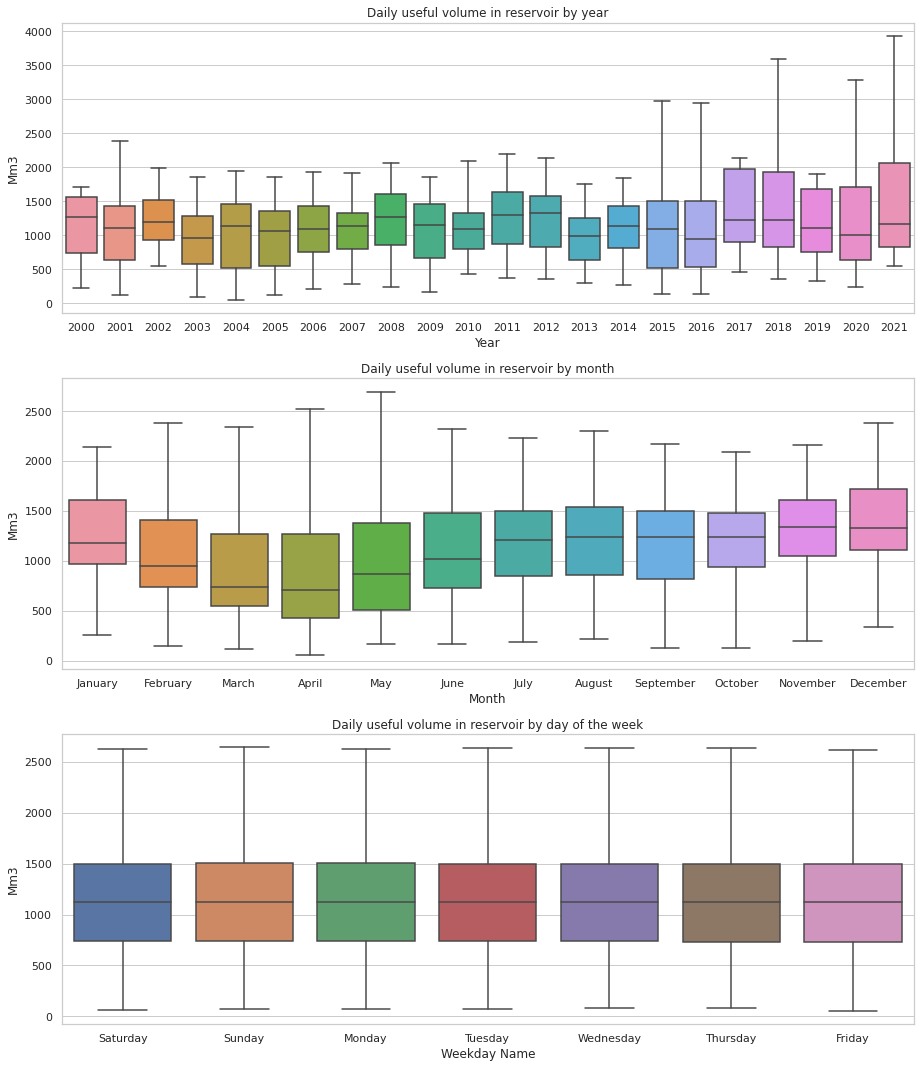

In [31]:
sns.set(style="whitegrid")

plt.subplots(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year",y='Volumen Útil Diario Mm3', data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Year", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("Mm3")
plt.title("Daily useful volume in reservoir by year")
#fig.savefig('reservoirvolume.jpg')

plt.subplot(323)
sns.boxplot(x="Month",y='Volumen Útil Diario Mm3',  data =df_by_day_rr,showfliers=False)
#sns.barplot(x="Month", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("Mm3")
plt.title("Daily useful volume in reservoir by month")
#fig.savefig('reservoirvolumemonth.jpg')

plt.subplot(325)
sns.boxplot(x="Weekday Name",y='Volumen Útil Diario Mm3',  data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Weekday Name", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("Mm3")
plt.title("Daily useful volume in reservoir by day of the week")

plt.tight_layout()

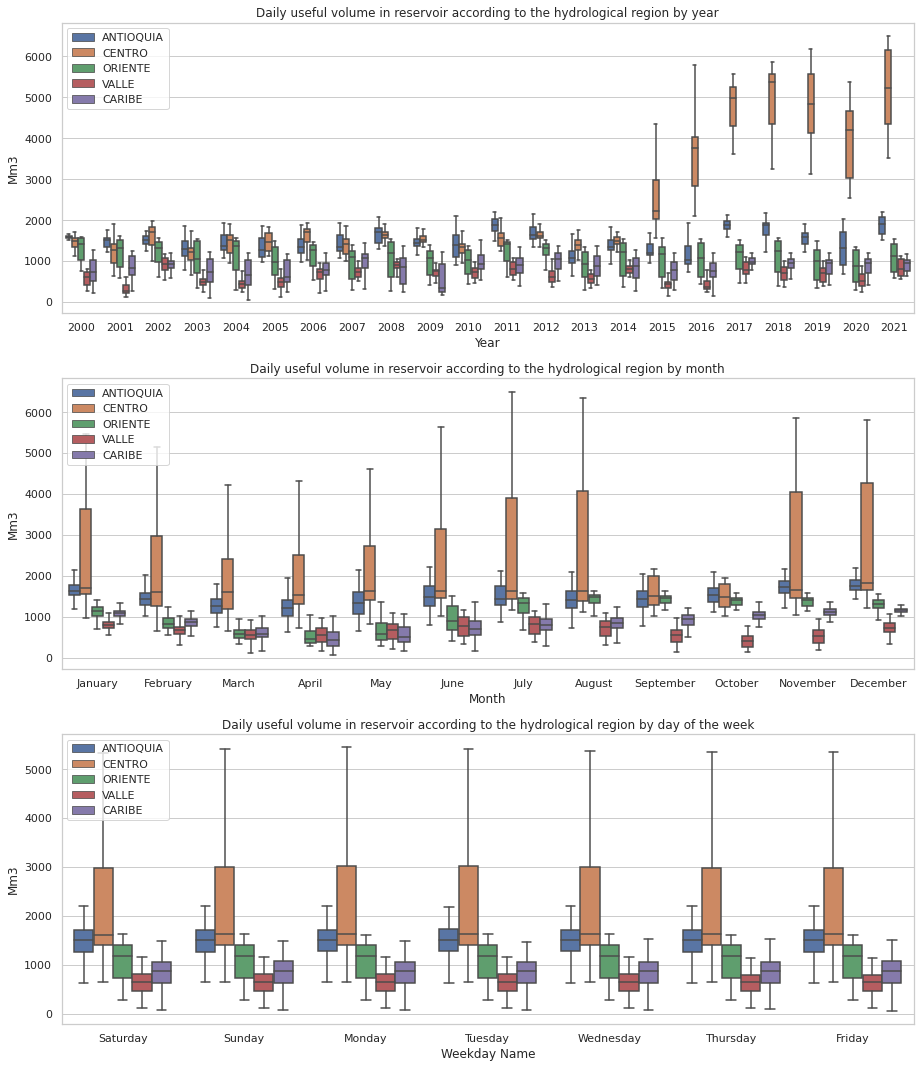

In [32]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year",y='Volumen Útil Diario Mm3', hue='Region Hidrologica',data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Year", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("Mm3")
plt.title("Daily useful volume in reservoir according to the hydrological region by year")
plt.legend(loc = 'upper left')

plt.subplot(323)
sns.boxplot(x="Month",y='Volumen Útil Diario Mm3', hue='Region Hidrologica', data =df_by_day_rr,showfliers=False)
#sns.barplot(x="Month", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("Mm3")
plt.title("Daily useful volume in reservoir according to the hydrological region by month")
plt.legend(loc = 'upper left')

plt.subplot(325)
sns.boxplot(x="Weekday Name",y='Volumen Útil Diario Mm3', hue='Region Hidrologica', data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Weekday Name", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("Mm3")
plt.title("Daily useful volume in reservoir according to the hydrological region by day of the week")
plt.legend(loc = 'upper left')

plt.tight_layout()

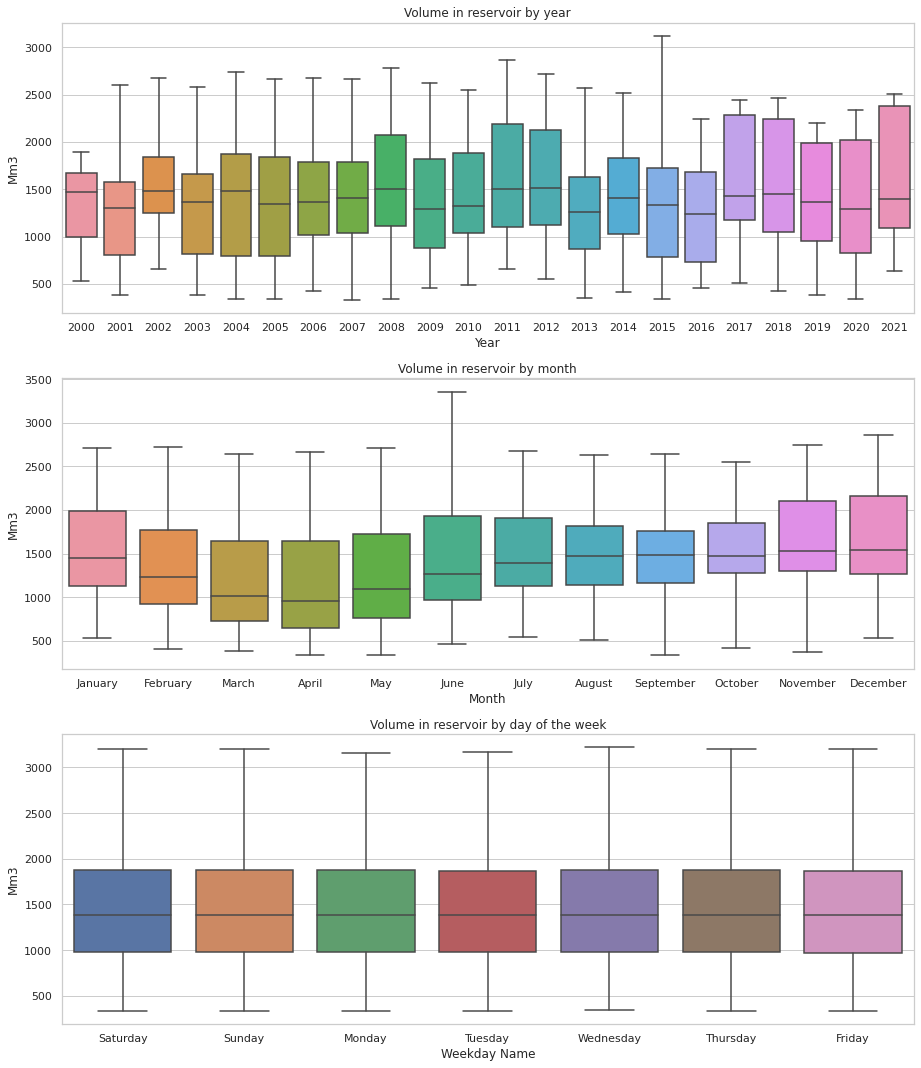

In [33]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year",y='Volumen Mm3', data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Year", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("Mm3")
plt.title("Volume in reservoir by year")

plt.subplot(323)
sns.boxplot(x="Month",y='Volumen Mm3',  data =df_by_day_rr,showfliers=False)
#sns.barplot(x="Month", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("Mm3")
plt.title("Volume in reservoir by month")

plt.subplot(325)
sns.boxplot(x="Weekday Name",y='Volumen Mm3',  data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Weekday Name", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("Mm3")
plt.title("Volume in reservoir by day of the week")

plt.tight_layout()

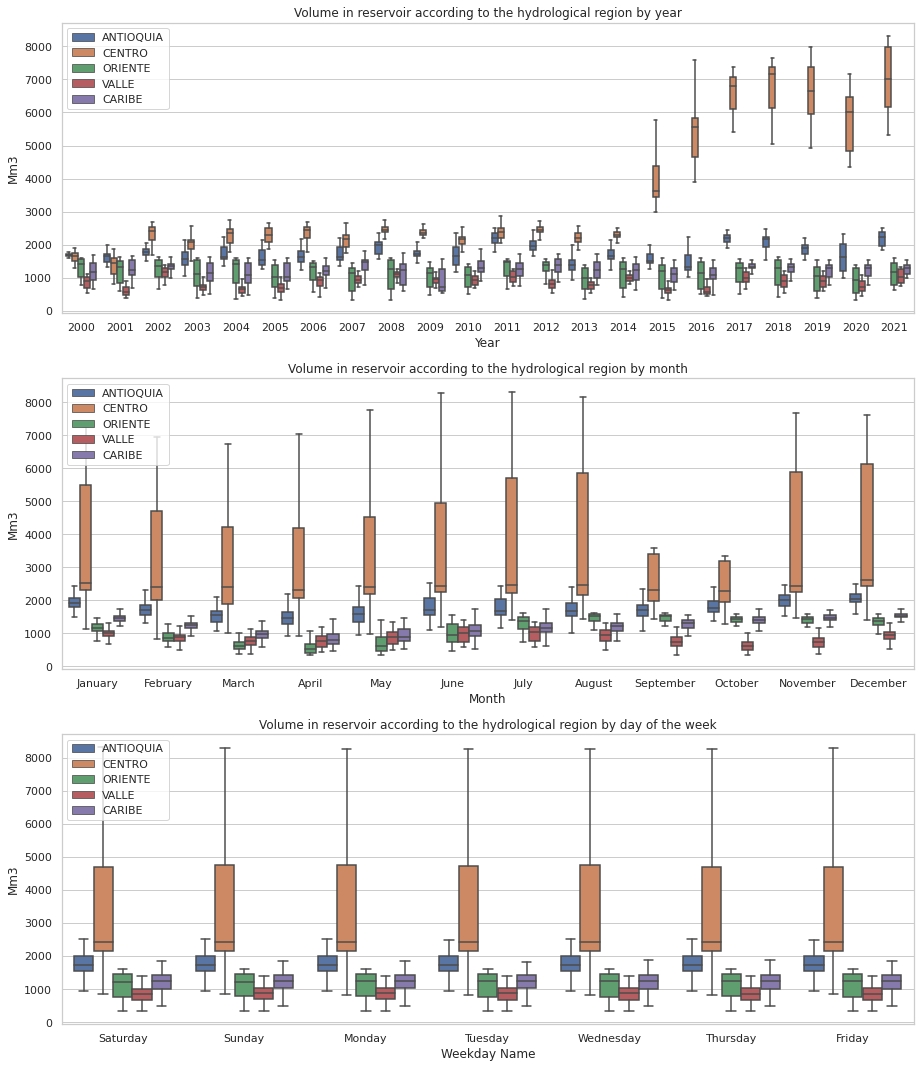

In [34]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year",y='Volumen Mm3', hue='Region Hidrologica', data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Year", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("Mm3")
plt.title("Volume in reservoir according to the hydrological region by year")
plt.legend(loc = 'upper left')

plt.subplot(323)
sns.boxplot(x="Month",y='Volumen Mm3', hue='Region Hidrologica', data =df_by_day_rr,showfliers=False)
#sns.barplot(x="Month", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("Mm3")
plt.title("Volume in reservoir according to the hydrological region by month")
plt.legend(loc = 'upper left')

plt.subplot(325)
sns.boxplot(x="Weekday Name",y='Volumen Mm3', hue='Region Hidrologica',  data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Weekday Name", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("Mm3")
plt.title("Volume in reservoir according to the hydrological region by day of the week")
plt.legend(loc = 'upper left')

plt.tight_layout()

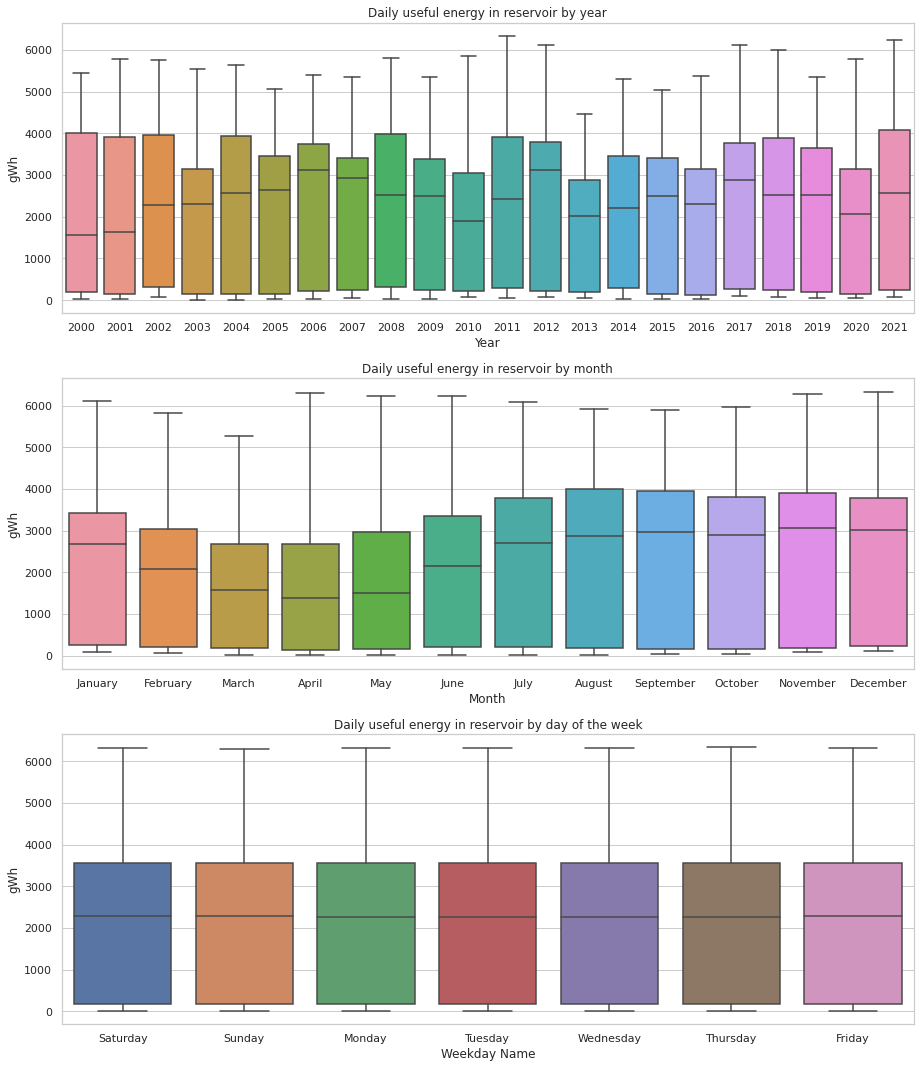

In [35]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year",y='Volumen Útil Diario Energía gWh', data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Year", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("gWh")
plt.title("Daily useful energy in reservoir by year")

plt.subplot(323)
sns.boxplot(x="Month",y='Volumen Útil Diario Energía gWh',  data =df_by_day_rr,showfliers=False)
#sns.barplot(x="Month", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("gWh")
plt.title("Daily useful energy in reservoir by month")

plt.subplot(325)
sns.boxplot(x="Weekday Name",y='Volumen Útil Diario Energía gWh',  data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Weekday Name", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("gWh")
plt.title("Daily useful energy in reservoir by day of the week")

plt.tight_layout()

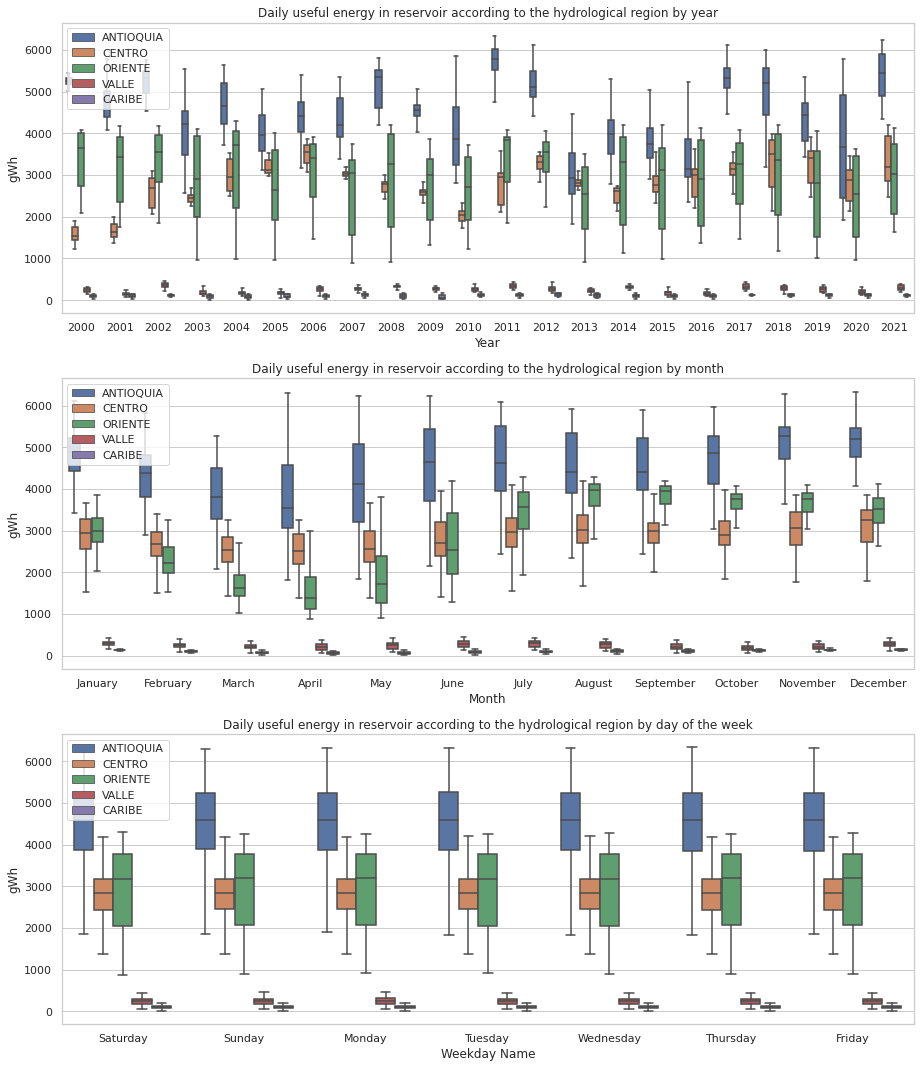

In [36]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year",y='Volumen Útil Diario Energía gWh',hue='Region Hidrologica', data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Year", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("gWh")
plt.title("Daily useful energy in reservoir according to the hydrological region by year")
plt.legend(loc = 'upper left')

plt.subplot(323)
sns.boxplot(x="Month",y='Volumen Útil Diario Energía gWh', hue='Region Hidrologica', data =df_by_day_rr,showfliers=False)
#sns.barplot(x="Month", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("gWh")
plt.title("Daily useful energy in reservoir according to the hydrological region by month")
plt.legend(loc = 'upper left')

plt.subplot(325)
sns.boxplot(x="Weekday Name",y='Volumen Útil Diario Energía gWh', hue='Region Hidrologica', data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Weekday Name", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("gWh")
plt.title("Daily useful energy in reservoir according to the hydrological region by day of the week")
plt.legend(loc = 'upper left')

plt.tight_layout()

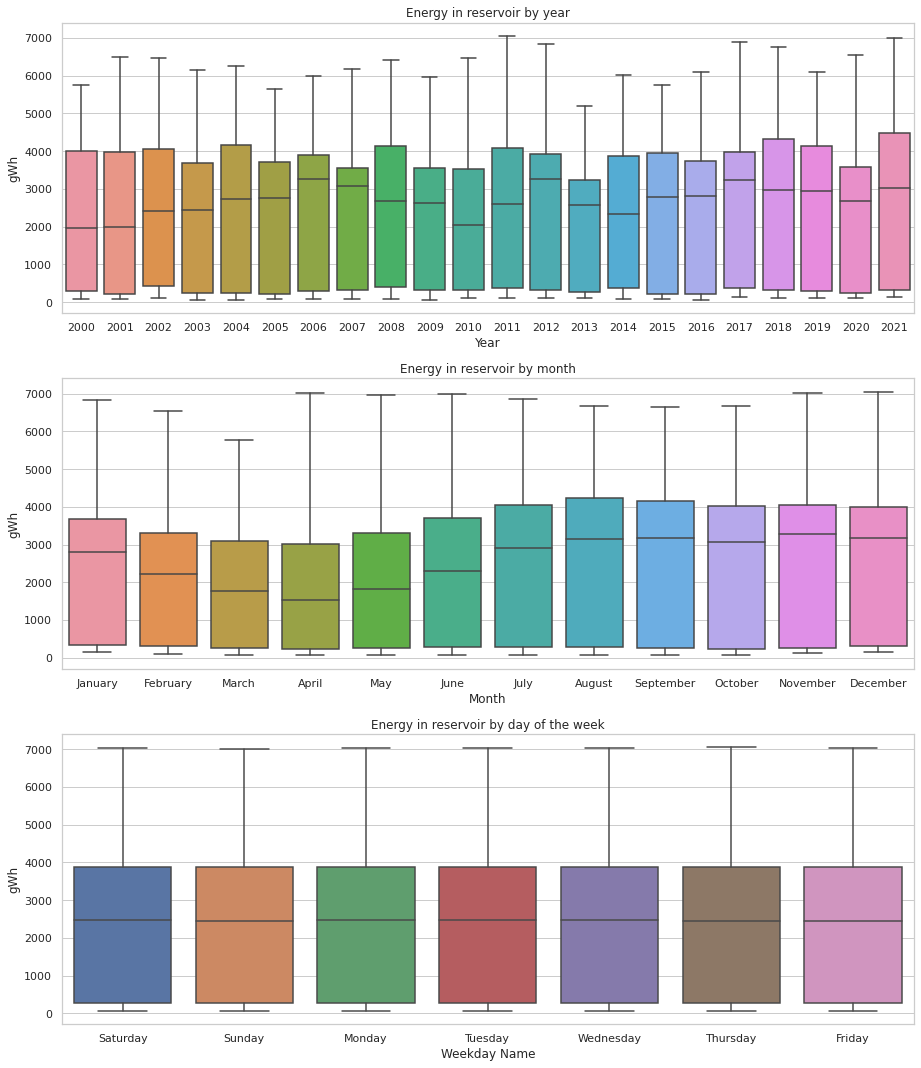

In [37]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year",y='Volumen Energía gWh', data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Year", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("gWh")
plt.title("Energy in reservoir by year")

plt.subplot(323)
sns.boxplot(x="Month",y='Volumen Energía gWh',  data =df_by_day_rr,showfliers=False)
#sns.barplot(x="Month", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("gWh")
plt.title("Energy in reservoir by month")

plt.subplot(325)
sns.boxplot(x="Weekday Name",y='Volumen Energía gWh',  data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Weekday Name", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("gWh")
plt.title("Energy in reservoir by day of the week")

plt.tight_layout()

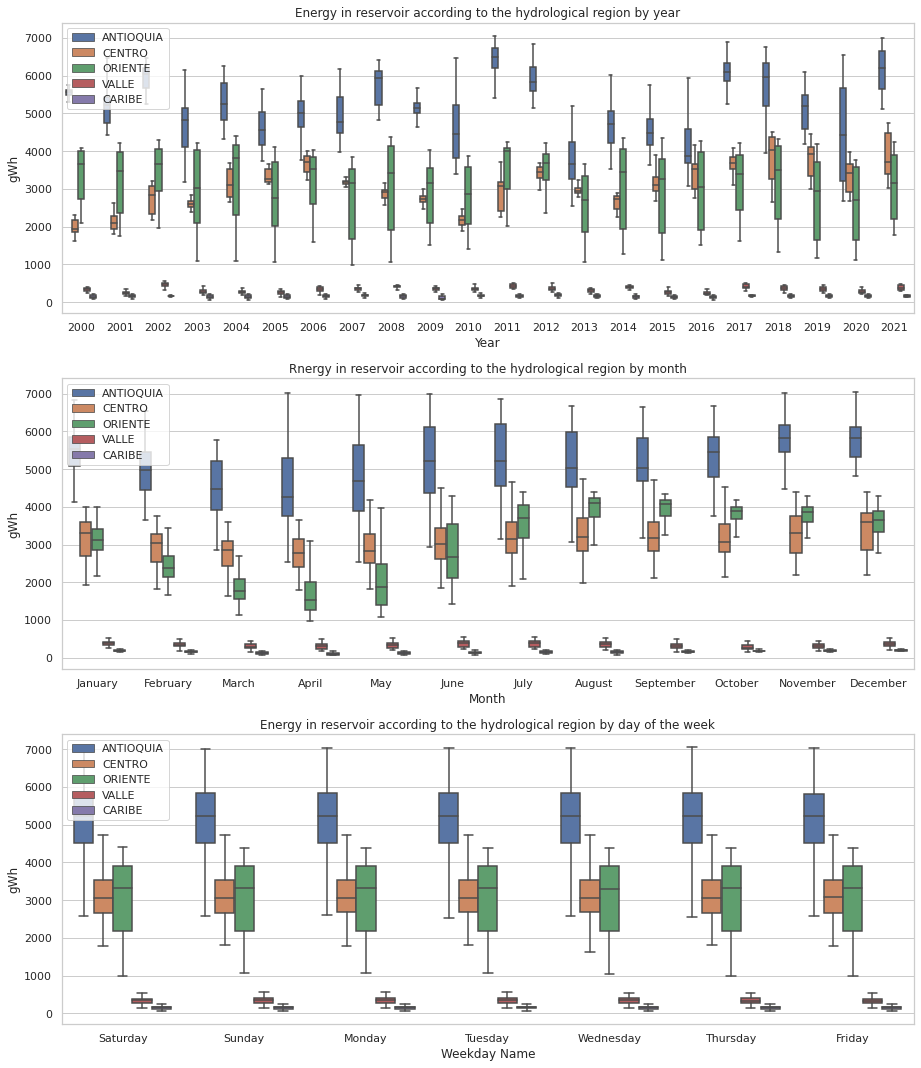

In [38]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year",y='Volumen Energía gWh',hue='Region Hidrologica', data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Year", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("gWh")
plt.title("Energy in reservoir according to the hydrological region by year")
plt.legend(loc = 'upper left')

plt.subplot(323)
sns.boxplot(x="Month",y='Volumen Energía gWh', hue='Region Hidrologica', data =df_by_day_rr,showfliers=False)
#sns.barplot(x="Month", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("gWh")
plt.title("Rnergy in reservoir according to the hydrological region by month")
plt.legend(loc = 'upper left')

plt.subplot(325)
sns.boxplot(x="Weekday Name",y='Volumen Energía gWh', hue='Region Hidrologica', data = df_by_day_rr,showfliers=False)
#sns.barplot(x="Weekday Name", y='Volumen Mm3',hue='Region Hidrologica', data = df_rd)
plt.ylabel("gWh")
plt.title("Energy in reservoir according to the hydrological region by day of the week")
plt.legend(loc = 'upper left')

plt.tight_layout()

In [39]:
df_y_r = df_by_day_rr.groupby(by=['Year']).sum().reset_index()
df_m_r = df_by_day_rr.groupby(by=['Month']).sum().reset_index()
df_d_r = df_by_day_rr.groupby(by=['Weekday Name']).sum().reset_index()

y_rg_y_r = df_by_day_rr.groupby(by=['Year','Region Hidrologica']).sum().reset_index()
y_rg_m_r = df_by_day_rr.groupby(by=['Month','Region Hidrologica']).sum().reset_index()
y_rg_d_r = df_by_day_rr.groupby(by=['Weekday Name','Region Hidrologica']).sum().reset_index()

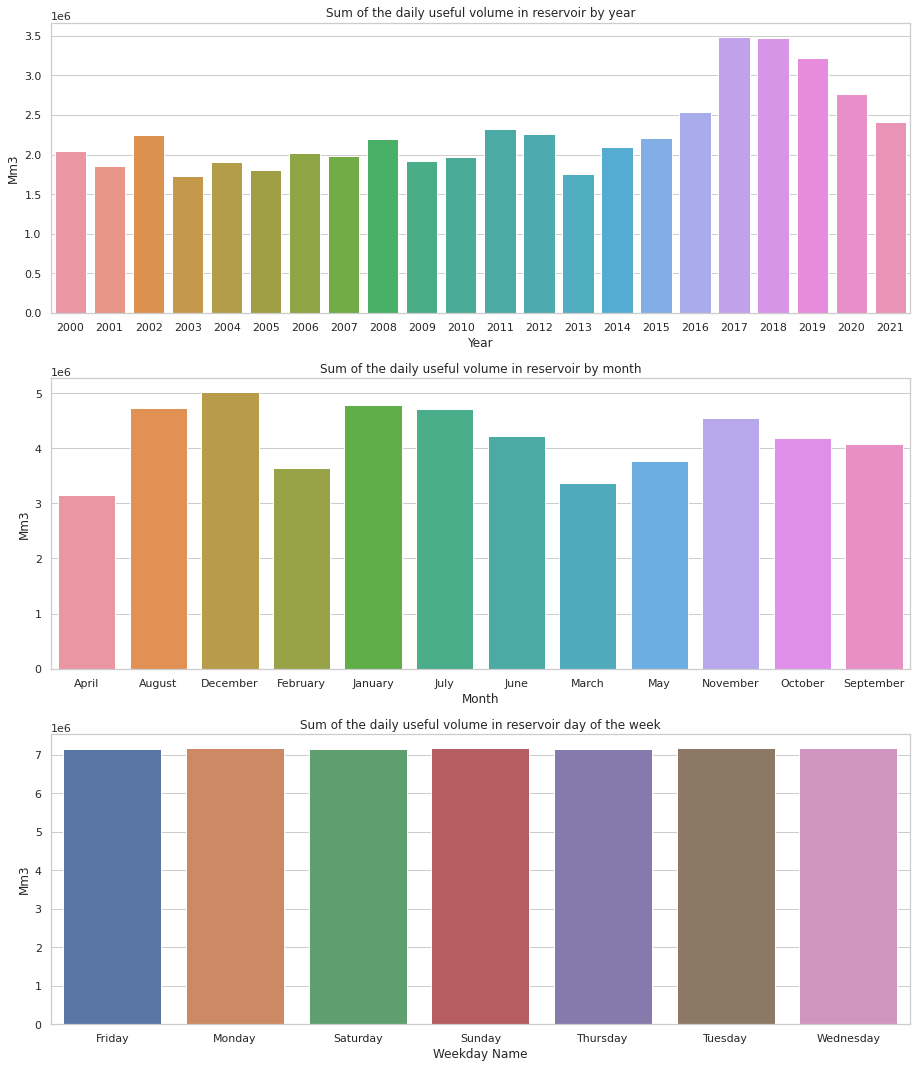

In [40]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Volumen Útil Diario Mm3', data = df_y_r)
plt.ylabel("Mm3")
plt.title("Sum of the daily useful volume in reservoir by year")

plt.subplot(323)
sns.barplot(x="Month", y='Volumen Útil Diario Mm3', data = df_m_r)
plt.ylabel("Mm3")
plt.title("Sum of the daily useful volume in reservoir by month")
plt.tight_layout()

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Volumen Útil Diario Mm3', data = df_d_r)
plt.ylabel("Mm3")
plt.title("Sum of the daily useful volume in reservoir day of the week")

plt.tight_layout()

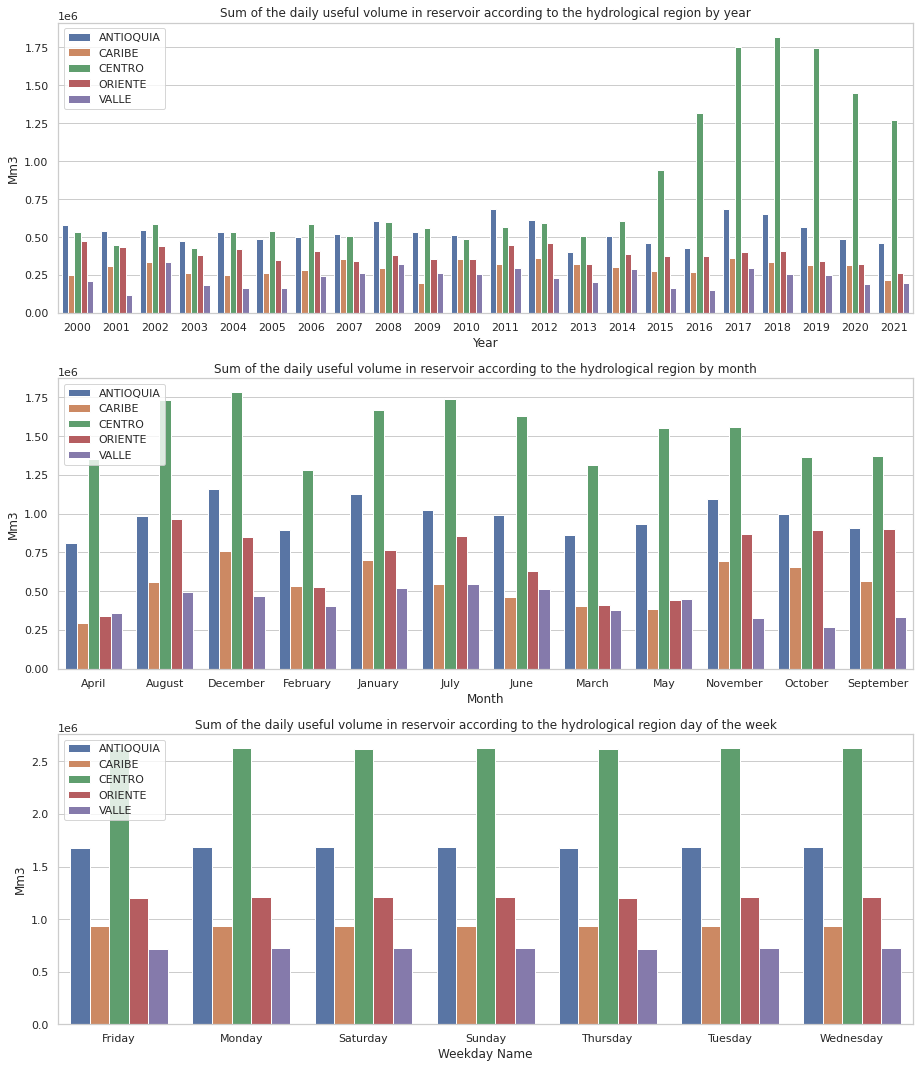

In [41]:

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Volumen Útil Diario Mm3', hue='Region Hidrologica',data = y_rg_y_r)
plt.ylabel("Mm3")
plt.title("Sum of the daily useful volume in reservoir according to the hydrological region by year")
plt.legend(loc = 'upper left')

plt.subplot(323)
sns.barplot(x="Month", y='Volumen Útil Diario Mm3',hue='Region Hidrologica', data = y_rg_m_r)
plt.ylabel("Mm3")
plt.title("Sum of the daily useful volume in reservoir according to the hydrological region by month")
plt.tight_layout()
plt.legend(loc = 'upper left')

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Volumen Útil Diario Mm3',hue='Region Hidrologica', data = y_rg_d_r)
plt.ylabel("Mm3")
plt.title("Sum of the daily useful volume in reservoir according to the hydrological region day of the week")
plt.legend(loc = 'upper left')

plt.tight_layout()

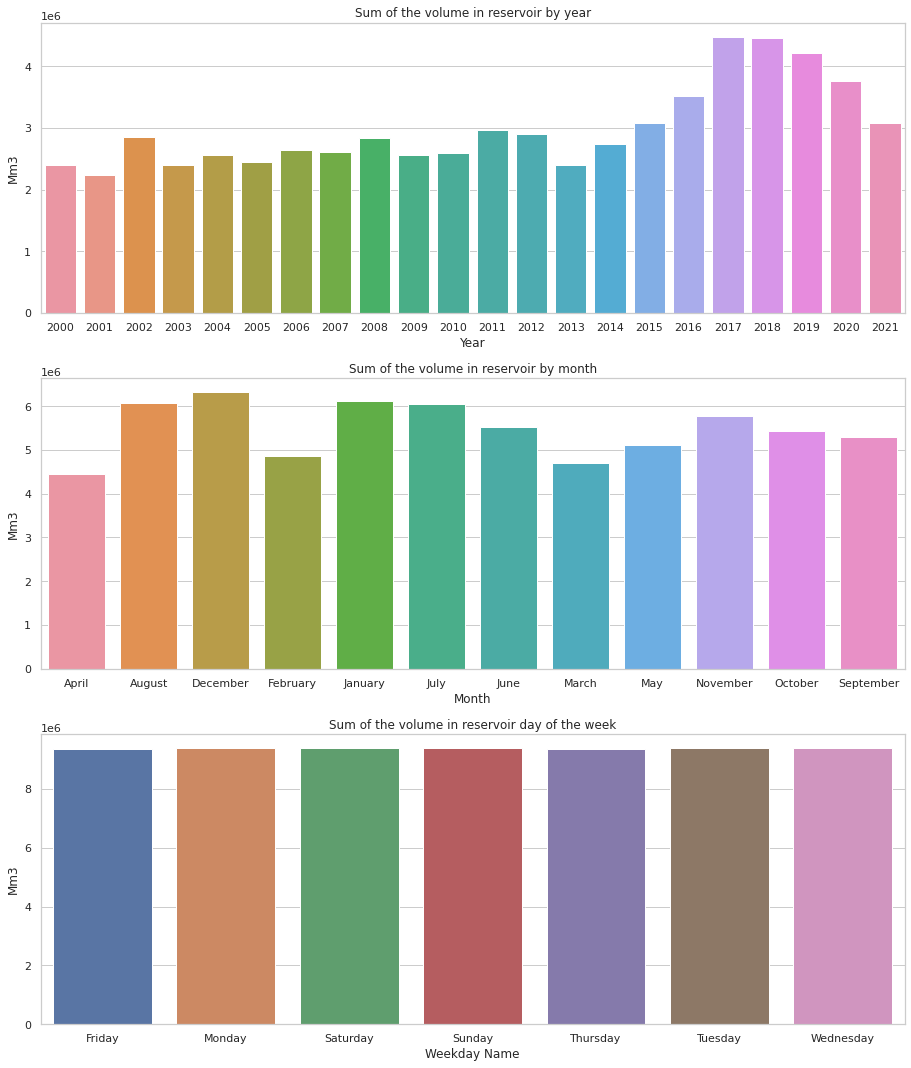

In [42]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Volumen Mm3', data = df_y_r)
plt.ylabel("Mm3")
plt.title("Sum of the volume in reservoir by year")

plt.subplot(323)
sns.barplot(x="Month", y='Volumen Mm3', data = df_m_r)
plt.ylabel("Mm3")
plt.title("Sum of the volume in reservoir by month")
plt.tight_layout()

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Volumen Mm3', data = df_d_r)
plt.ylabel("Mm3")
plt.title("Sum of the volume in reservoir day of the week")

plt.tight_layout()

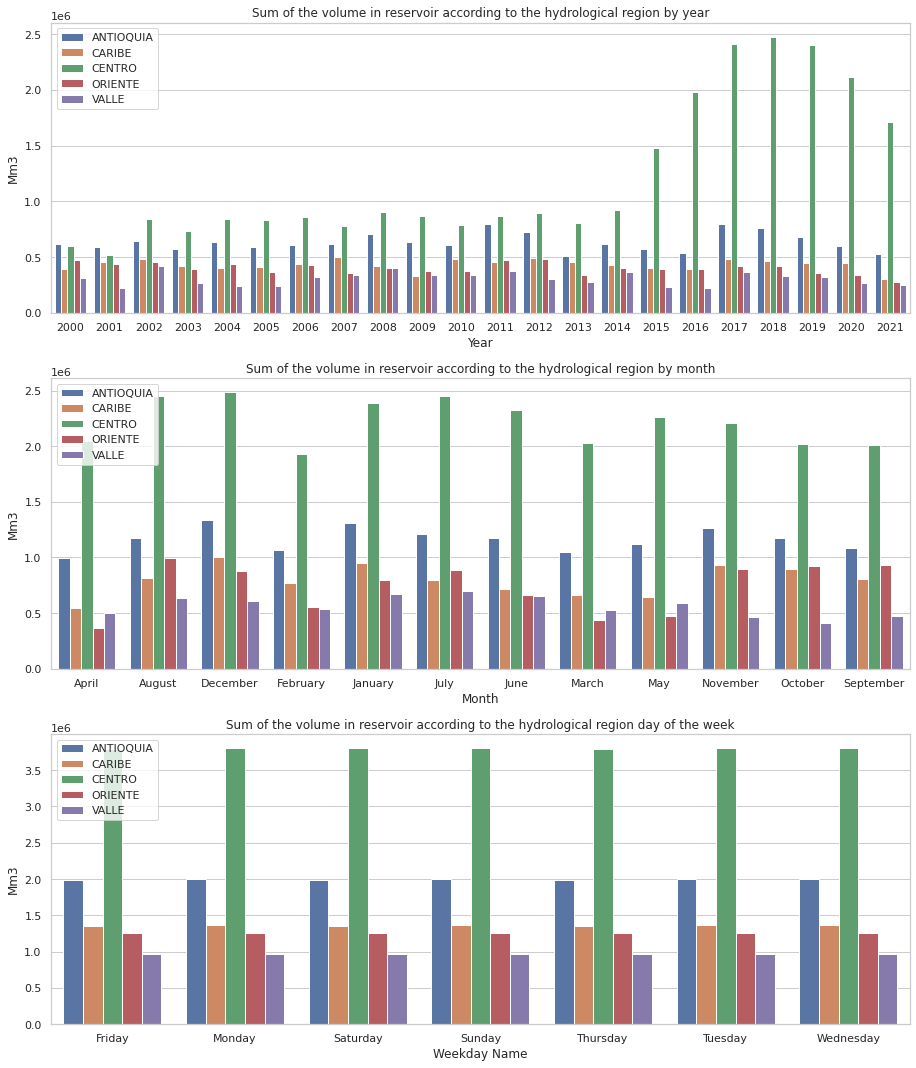

In [43]:
plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Volumen Mm3', hue='Region Hidrologica',data = y_rg_y_r)
plt.ylabel("Mm3")
plt.title("Sum of the volume in reservoir according to the hydrological region by year")
plt.legend(loc = 'upper left')

plt.subplot(323)
sns.barplot(x="Month", y='Volumen Mm3',hue='Region Hidrologica', data = y_rg_m_r)
plt.ylabel("Mm3")
plt.title("Sum of the volume in reservoir according to the hydrological region by month")
plt.tight_layout()
plt.legend(loc = 'upper left')

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Volumen Mm3',hue='Region Hidrologica', data = y_rg_d_r)
plt.ylabel("Mm3")
plt.title("Sum of the volume in reservoir according to the hydrological region day of the week")
plt.legend(loc = 'upper left')

plt.tight_layout()

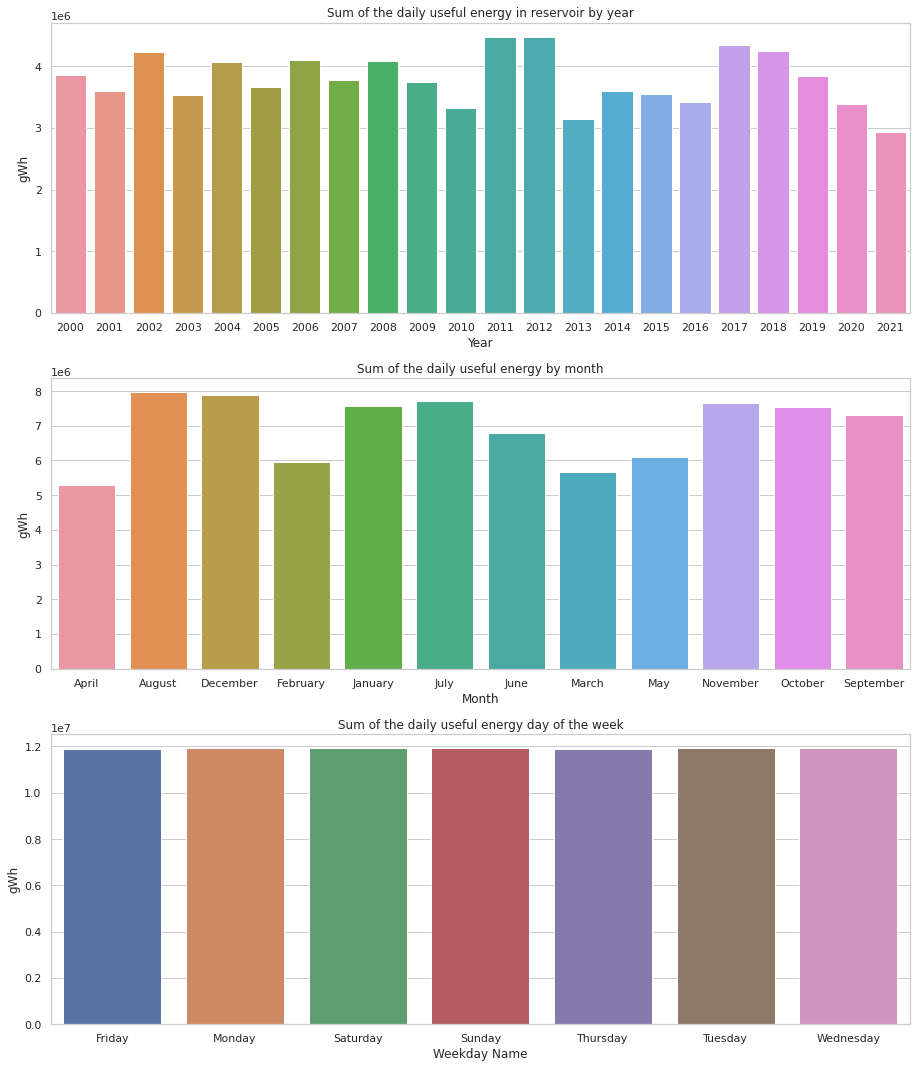

In [44]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Volumen Útil Diario Energía gWh', data = df_y_r)
plt.ylabel("gWh")
plt.title("Sum of the daily useful energy in reservoir by year")

plt.subplot(323)
sns.barplot(x="Month", y='Volumen Útil Diario Energía gWh', data = df_m_r)
plt.ylabel("gWh")
plt.title("Sum of the daily useful energy by month")
plt.tight_layout()

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Volumen Útil Diario Energía gWh', data = df_d_r)
plt.ylabel("gWh")
plt.title("Sum of the daily useful energy day of the week")

plt.tight_layout()

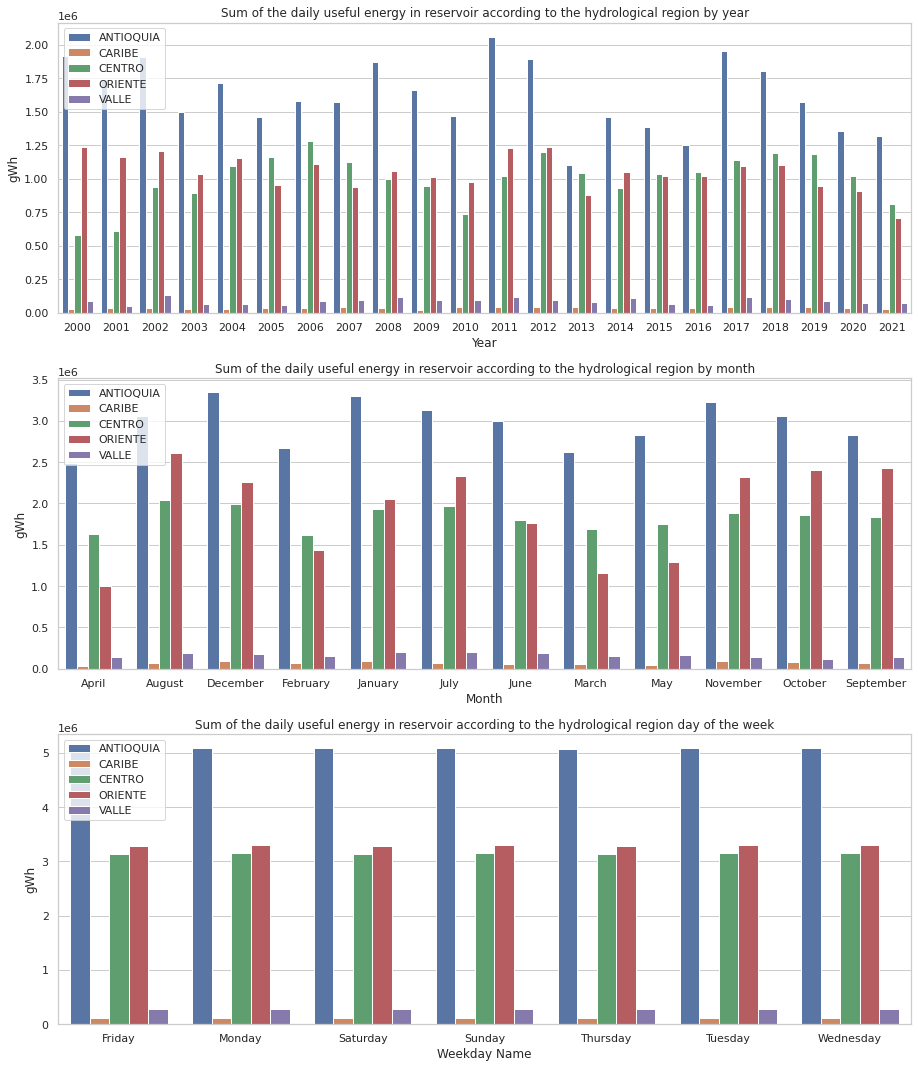

In [45]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Volumen Útil Diario Energía gWh',hue='Region Hidrologica', data = y_rg_y_r)
plt.ylabel("gWh")
plt.title("Sum of the daily useful energy in reservoir according to the hydrological region by year")
plt.legend(loc = 'upper left')

plt.subplot(323)
sns.barplot(x="Month", y='Volumen Útil Diario Energía gWh',hue='Region Hidrologica', data = y_rg_m_r)
plt.ylabel("gWh")
plt.title("Sum of the daily useful energy in reservoir according to the hydrological region by month")
plt.legend(loc = 'upper left')

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Volumen Útil Diario Energía gWh',hue='Region Hidrologica', data = y_rg_d_r)
plt.ylabel("gWh")
plt.title("Sum of the daily useful energy in reservoir according to the hydrological region day of the week")
plt.legend(loc = 'upper left')

plt.tight_layout()

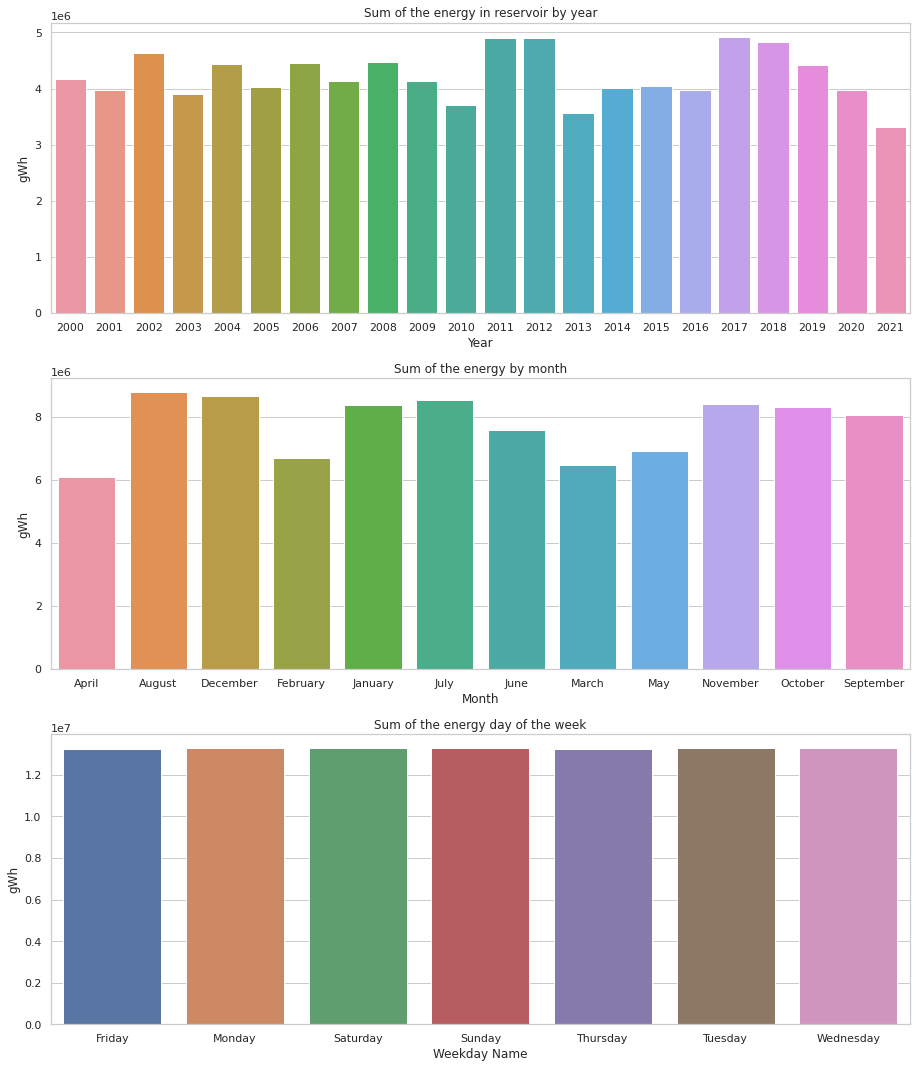

In [46]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Volumen Energía gWh', data = df_y_r)
plt.ylabel("gWh")
plt.title("Sum of the energy in reservoir by year")

plt.subplot(323)
sns.barplot(x="Month", y='Volumen Energía gWh', data = df_m_r)
plt.ylabel("gWh")
plt.title("Sum of the energy by month")
plt.tight_layout()

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Volumen Energía gWh', data = df_d_r)
plt.ylabel("gWh")
plt.title("Sum of the energy day of the week")

plt.tight_layout()

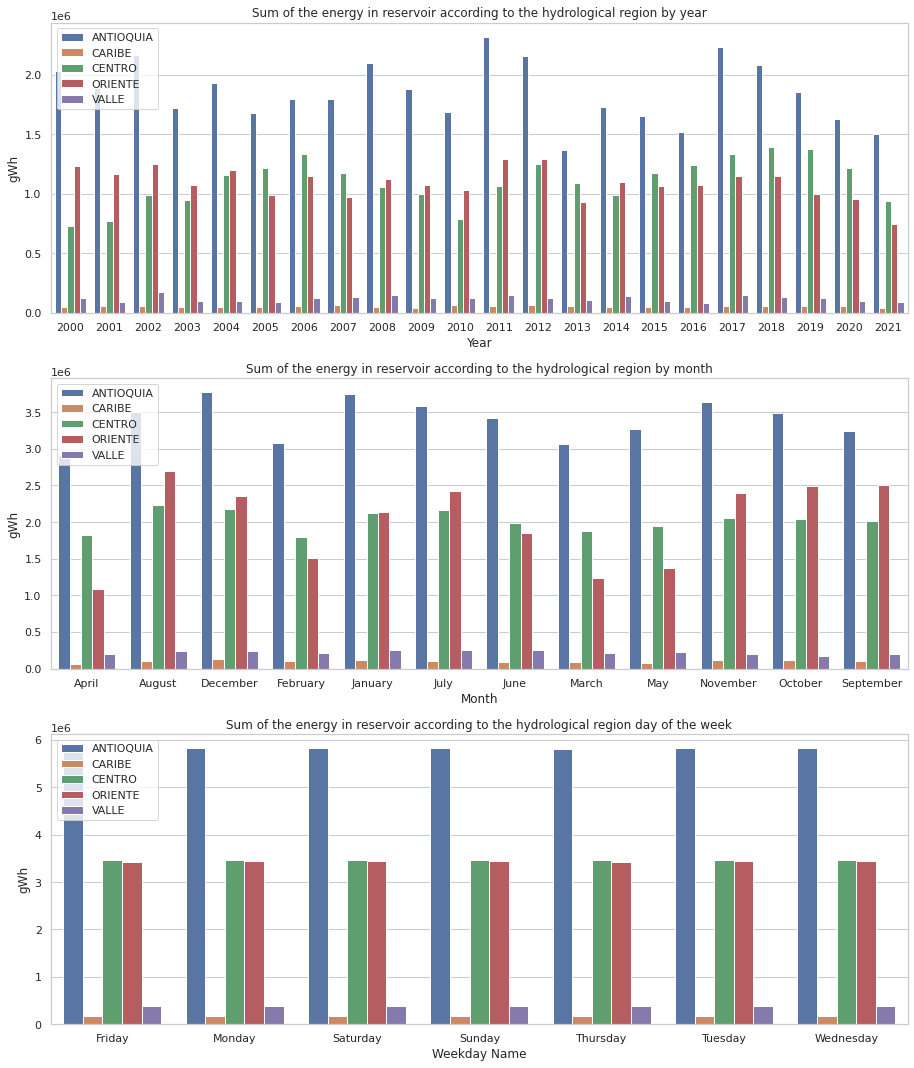

In [47]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Volumen Energía gWh',hue='Region Hidrologica', data = y_rg_y_r)
plt.ylabel("gWh")
plt.title("Sum of the energy in reservoir according to the hydrological region by year")
plt.legend(loc = 'upper left')

plt.subplot(323)
sns.barplot(x="Month", y='Volumen Energía gWh',hue='Region Hidrologica', data = y_rg_m_r)
plt.ylabel("gWh")
plt.title("Sum of the energy in reservoir according to the hydrological region by month")
plt.legend(loc = 'upper left')

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Volumen Energía gWh',hue='Region Hidrologica', data = y_rg_d_r)
plt.ylabel("gWh")
plt.title("Sum of the energy in reservoir according to the hydrological region day of the week")
plt.legend(loc = 'upper left')

plt.tight_layout()

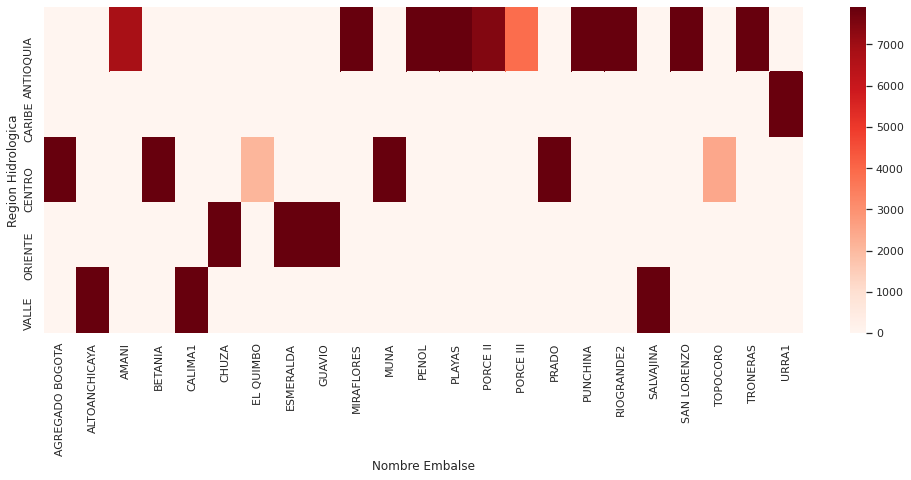

In [48]:
# tabla de contingencia entre la region hidrologica y los Embalses
my_contingency_table = pd.crosstab(index=df_rd['Region Hidrologica'], columns=df_rd['Nombre Embalse'])
plt.subplots(figsize=(17,6))
sns.heatmap(my_contingency_table, cmap="Reds")

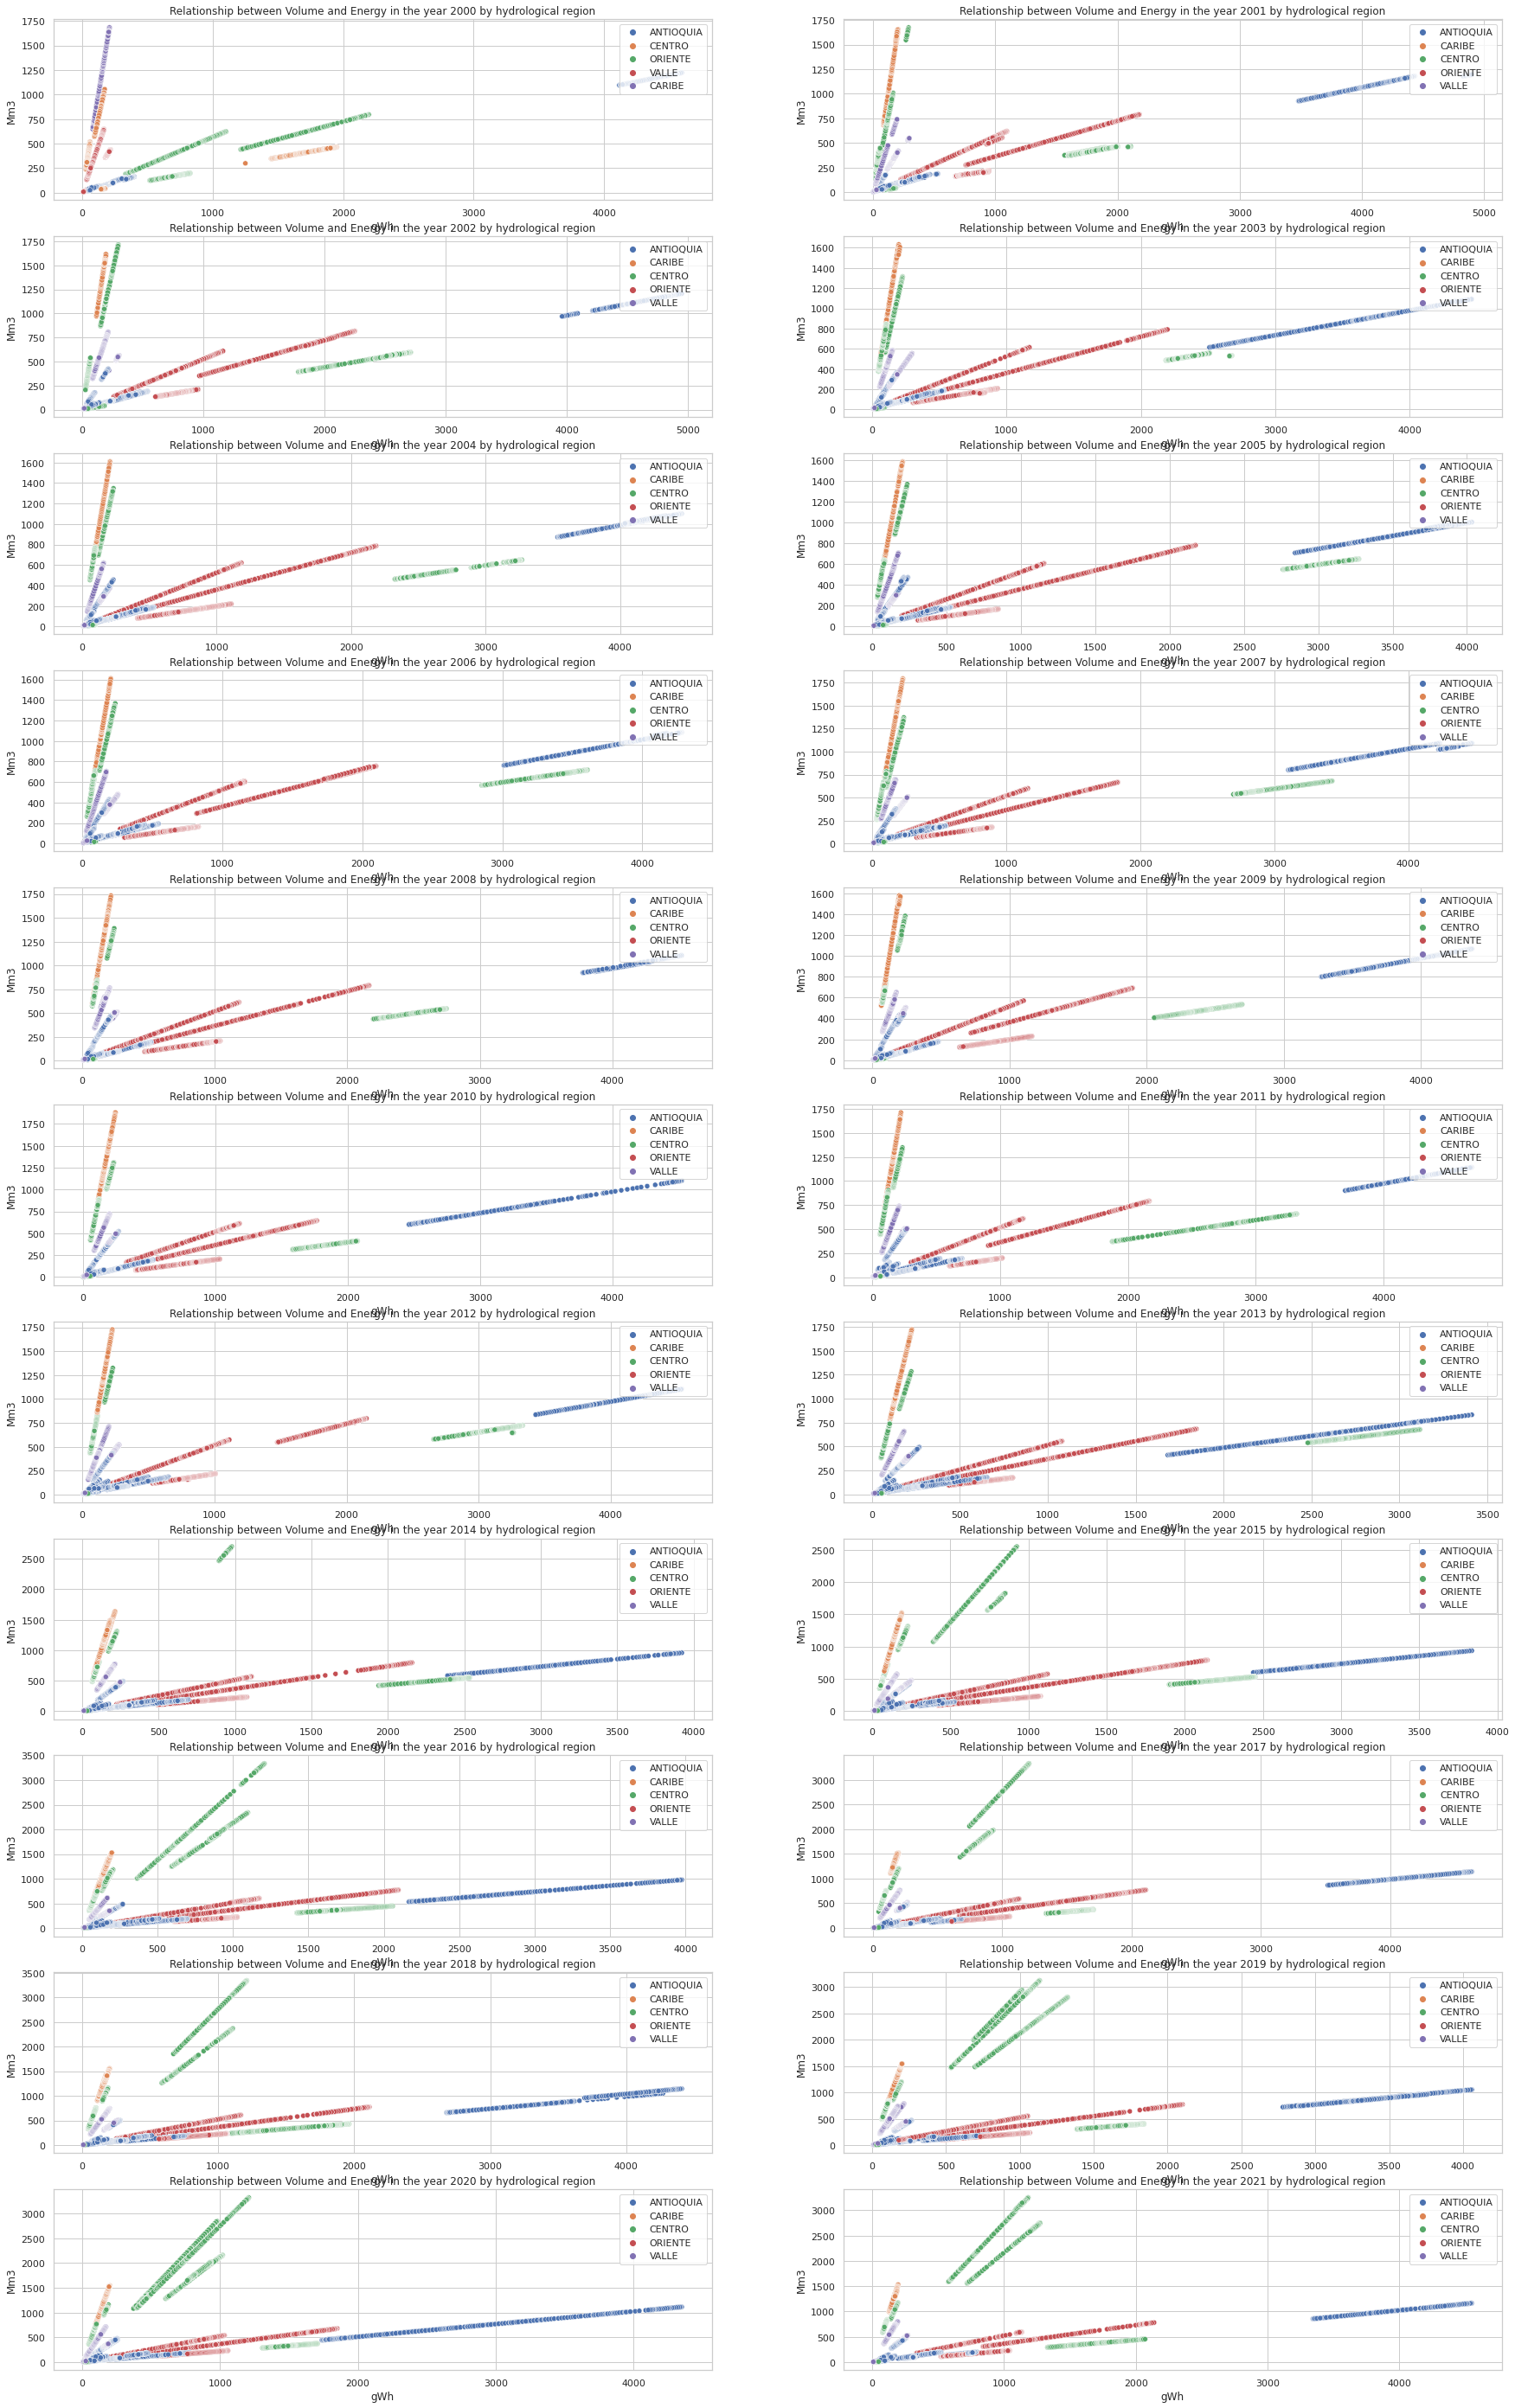

In [52]:
plt.figure(figsize=(30,50))
for i,var in enumerate(list(set(df_rd['Year']))):
    plt.subplot(11,2,i+1)
    df_temp = df_rd[df_rd['Year']==var]
    sns.scatterplot(x='Volumen Energía gWh', y='Volumen Mm3',hue='Region Hidrologica', data=df_temp)
    plt.xlabel("gWh")
    plt.ylabel("Mm3")
    plt.title("Relationship between Volume and Energy in the year " + str(var) + " by hydrological region")
    plt.legend(loc = 'upper right')

In [53]:
df_rd_temp_2_r=df_rd.groupby(["Fecha"]).sum().reset_index()
df_rd_temp_2_r.head(2)

Fecha  ...  Volumen Energía gWh
0 2000-01-01  ...           11548.8853
1 2000-01-02  ...           11529.0276

[2 rows x 9 columns]

Text(0.5, 1.0, 'Time serie of the daily useful energy in resevoir')

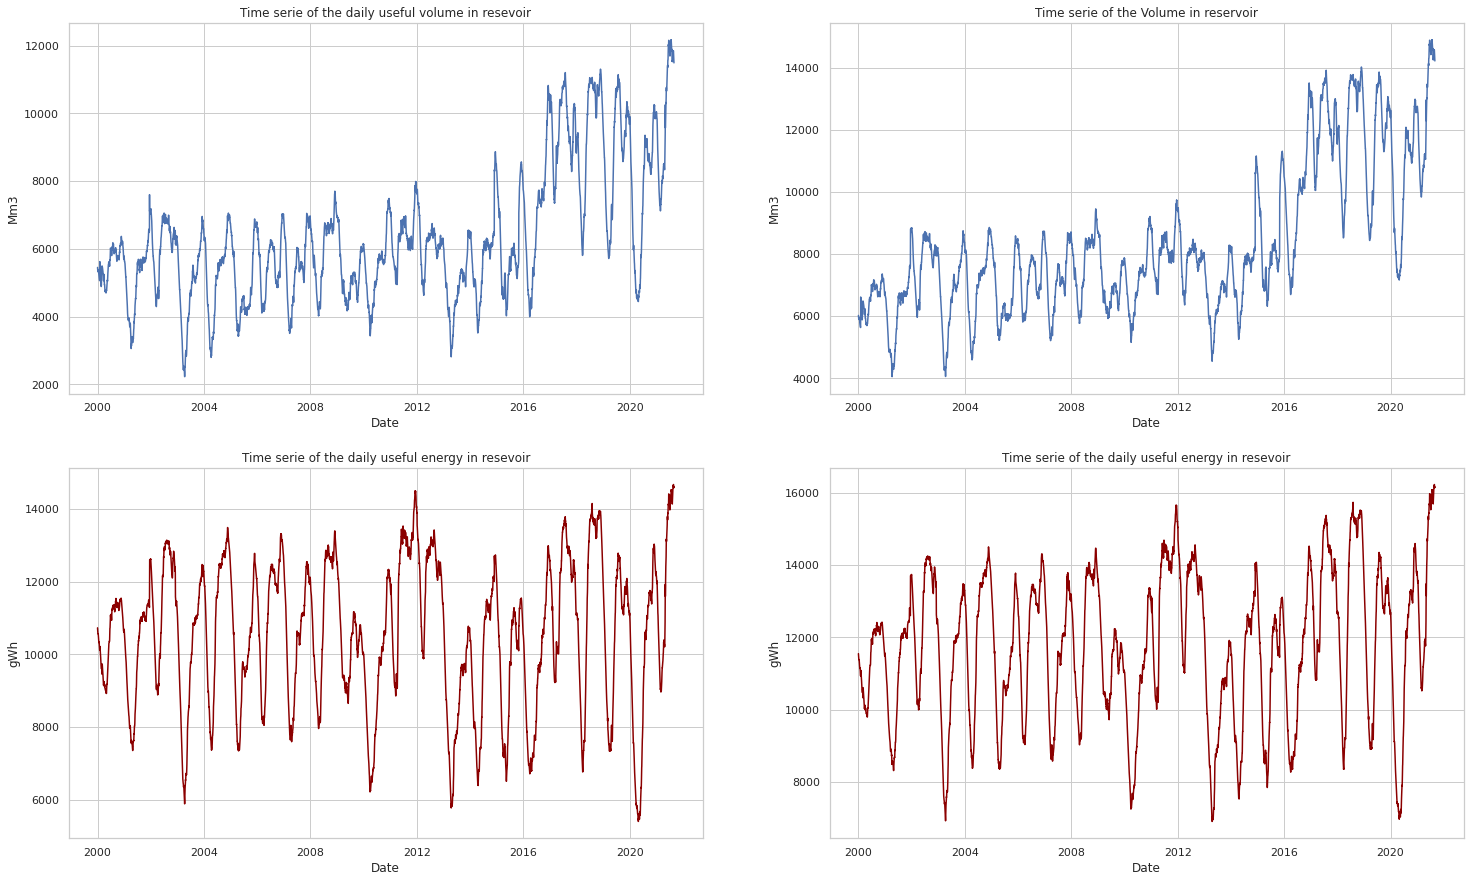

In [54]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(221)
sns.lineplot(x="Fecha", y='Volumen Útil Diario Mm3', data=df_rd_temp_2_r)
plt.xlabel("Date")
plt.ylabel("Mm3")
plt.title("Time serie of the daily useful volume in resevoir")

plt.subplot(222)
sns.lineplot(x="Fecha", y="Volumen Mm3", data=df_rd_temp_2_r)
plt.xlabel("Date")
plt.ylabel("Mm3")
plt.title("Time serie of the Volume in reservoir")

plt.subplot(223)
sns.lineplot(x="Fecha", y='Volumen Útil Diario Energía gWh', data=df_rd_temp_2_r,color="darkred")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the daily useful energy in resevoir")

plt.subplot(224)
sns.lineplot(x="Fecha", y='Volumen Energía gWh', data=df_rd_temp_2_r,color="darkred")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the daily useful energy in resevoir")

In [55]:
#df_vert_temp=df_by_day_vv.set_index('Fecha', inplace = True) 
#df_vert_temp
#df_by_day_vv.head(5)



df_Valle_rr = df_by_day_rr[df_by_day_rr['Region Hidrologica'] == 'VALLE']
df_Centro_rr = df_by_day_rr[df_by_day_rr['Region Hidrologica'] == 'CENTRO']
df_Oriente_rr = df_by_day_rr[df_by_day_rr['Region Hidrologica'] == 'ORIENTE']
df_Caribe_rr = df_by_day_rr[df_by_day_rr['Region Hidrologica'] == 'CARIBE']
df_Antioquia_rr = df_by_day_rr[df_by_day_rr['Region Hidrologica'] == 'ANTIOQUIA']

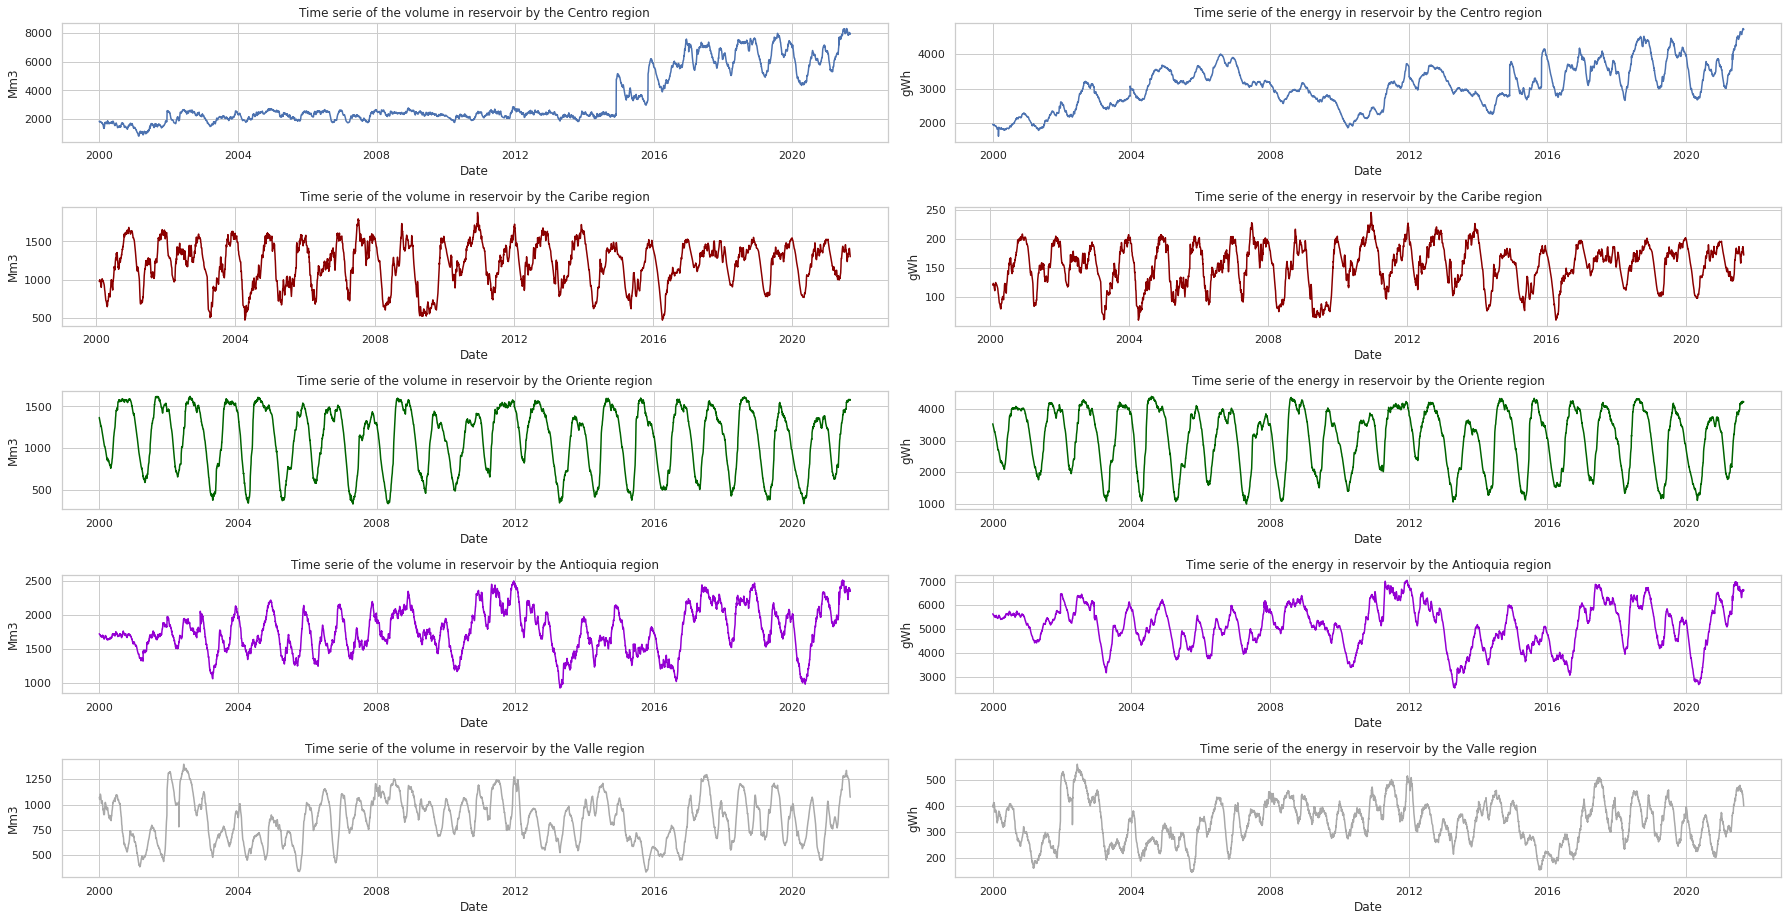

In [56]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(621)
sns.lineplot(x="Fecha", y="Volumen Mm3", data=df_Centro_rr)
plt.xlabel("Date")
plt.ylabel("Mm3")
plt.title("Time serie of the volume in reservoir by the Centro region")

plt.subplot(622)
sns.lineplot(x="Fecha", y='Volumen Energía gWh', data=df_Centro_rr)
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy in reservoir by the Centro region")

plt.subplot(623)
sns.lineplot(x="Fecha", y="Volumen Mm3", data=df_Caribe_rr,color="darkred")
plt.xlabel("Date")
plt.ylabel("Mm3")
plt.title("Time serie of the volume in reservoir by the Caribe region")

plt.subplot(624)
sns.lineplot(x="Fecha", y='Volumen Energía gWh', data=df_Caribe_rr,color="darkred")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy in reservoir by the Caribe region")

plt.subplot(625)
sns.lineplot(x="Fecha", y="Volumen Mm3", data=df_Oriente_rr,color="darkgreen")
plt.xlabel("Date")
plt.ylabel("Mm3")
plt.title("Time serie of the volume in reservoir by the Oriente region")

plt.subplot(626)
sns.lineplot(x="Fecha", y='Volumen Energía gWh', data=df_Oriente_rr,color="darkgreen")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy in reservoir by the Oriente region")

plt.subplot(627)
sns.lineplot(x="Fecha", y="Volumen Mm3", data=df_Antioquia_rr, color="darkviolet")
plt.xlabel("Date")
plt.ylabel("Mm3")
plt.title("Time serie of the volume in reservoir by the Antioquia region")

plt.subplot(628)
sns.lineplot(x="Fecha", y='Volumen Energía gWh', data=df_Antioquia_rr,color="darkviolet")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy in reservoir by the Antioquia region")

plt.subplot(629)
sns.lineplot(x="Fecha", y="Volumen Mm3", data=df_Valle_rr, color='darkgray' )
plt.xlabel("Date")
plt.ylabel("Mm3")
plt.title("Time serie of the volume in reservoir by the Valle region")

plt.subplot(6,2,10)
sns.lineplot(x="Fecha", y='Volumen Energía gWh', data=df_Valle_rr,color='darkgray')
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy in reservoir by the Valle region")

plt.tight_layout()

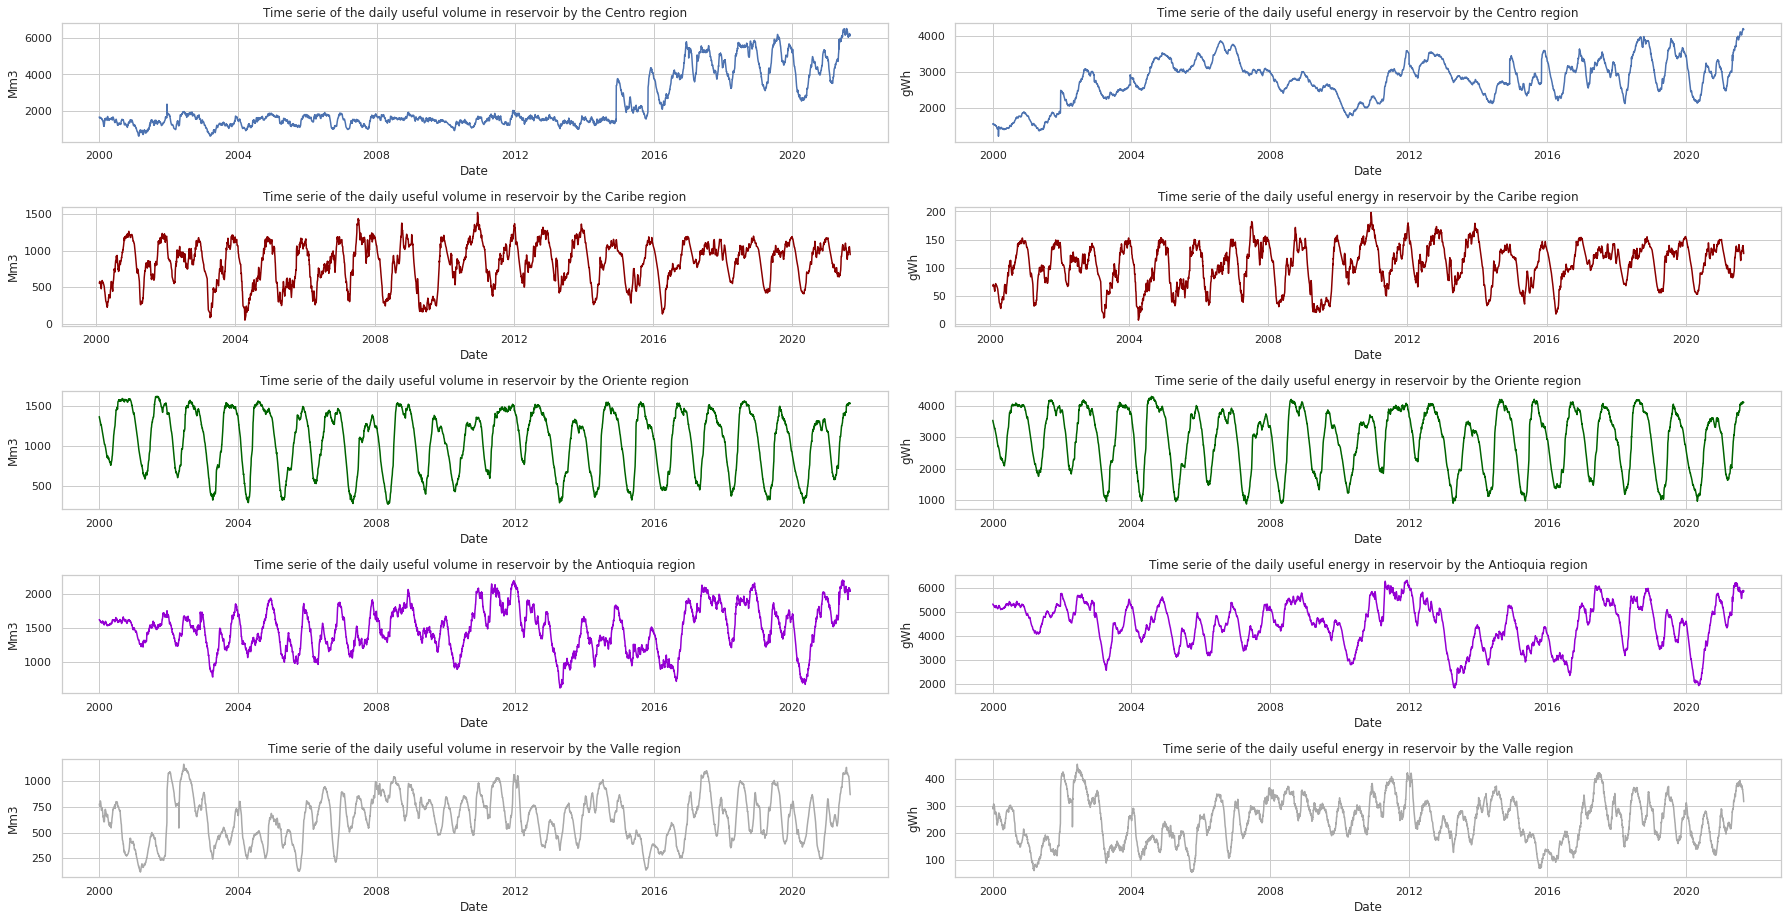

In [57]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(621)
sns.lineplot(x="Fecha", y='Volumen Útil Diario Mm3', data=df_Centro_rr)
plt.xlabel("Date")
plt.ylabel("Mm3")
plt.title("Time serie of the daily useful volume in reservoir by the Centro region")

plt.subplot(622)
sns.lineplot(x="Fecha", y='Volumen Útil Diario Energía gWh', data=df_Centro_rr)
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the daily useful energy in reservoir by the Centro region")

plt.subplot(623)
sns.lineplot(x="Fecha", y='Volumen Útil Diario Mm3', data=df_Caribe_rr,color="darkred")
plt.xlabel("Date")
plt.ylabel("Mm3")
plt.title("Time serie of the daily useful volume in reservoir by the Caribe region")

plt.subplot(624)
sns.lineplot(x="Fecha", y='Volumen Útil Diario Energía gWh', data=df_Caribe_rr,color="darkred")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the daily useful energy in reservoir by the Caribe region")

plt.subplot(625)
sns.lineplot(x="Fecha", y='Volumen Útil Diario Mm3', data=df_Oriente_rr,color="darkgreen")
plt.xlabel("Date")
plt.ylabel("Mm3")
plt.title("Time serie of the daily useful volume in reservoir by the Oriente region")

plt.subplot(626)
sns.lineplot(x="Fecha", y='Volumen Útil Diario Energía gWh', data=df_Oriente_rr,color="darkgreen")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the daily useful energy in reservoir by the Oriente region")

plt.subplot(627)
sns.lineplot(x="Fecha", y='Volumen Útil Diario Mm3', data=df_Antioquia_rr, color="darkviolet")
plt.xlabel("Date")
plt.ylabel("Mm3")
plt.title("Time serie of the daily useful volume in reservoir by the Antioquia region")

plt.subplot(628)
sns.lineplot(x="Fecha", y='Volumen Útil Diario Energía gWh', data=df_Antioquia_rr,color="darkviolet")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the daily useful energy in reservoir by the Antioquia region")

plt.subplot(629)
sns.lineplot(x="Fecha", y='Volumen Útil Diario Mm3', data=df_Valle_rr, color='darkgray' )
plt.xlabel("Date")
plt.ylabel("Mm3")
plt.title("Time serie of the daily useful volume in reservoir by the Valle region")

plt.subplot(6,2,10)
sns.lineplot(x="Fecha", y='Volumen Útil Diario Energía gWh', data=df_Valle_rr,color='darkgray')
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the daily useful energy in reservoir by the Valle region")

plt.tight_layout()

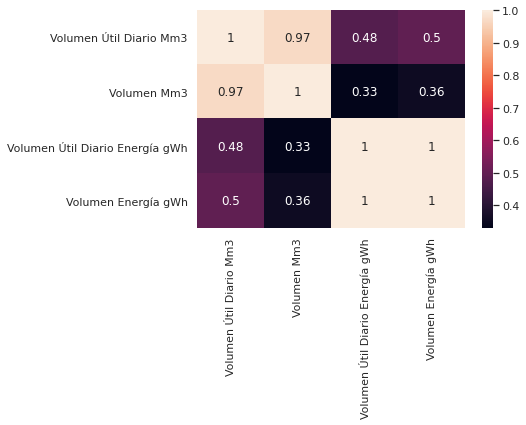

In [58]:
df_small = df_rd.loc[:,['Volumen Útil Diario Mm3','Volumen Mm3','Volumen Útil Diario Energía gWh','Volumen Energía gWh']]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()